In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [2]:
airbnb_b = pd.read_csv(r'C:\Users\funny\Desktop\Bootcamp\mesa_trabajo_core\repo_sept_23\proyectos\EDA\Data\listings_insideairbnb.csv')
airbnb_b

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,48154,Rental unit in Valencia · ★4.56 · 2 bedrooms ·...,219476,Toni,LA SAIDIA,MORVEDRE,39.483750,-0.375020,Entire home/apt,89,4,137,2023-08-31,0.87,4,52,9,VT-41540-V
1,55692,Rental unit in Valencia · 1 bedroom · 1 bed,120649,Pilar,CIUTAT VELLA,LA SEU,39.476580,-0.376540,Entire home/apt,100,1,1,2014-11-11,0.01,1,0,0,NaN
2,100347,Rental unit in València · ★4.58 · 3 bedrooms ·...,1451371,Santiago,EXTRAMURS,ARRANCAPINS,39.459650,-0.384530,Entire home/apt,171,3,142,2023-09-01,2.02,1,0,7,NaN
3,102524,Villa in Valencia · ★4.56 · 5 bedrooms · 20 be...,535881,Vicente,POBLATS MARITIMS,LA MALVA-ROSA,39.481970,-0.324560,Entire home/apt,532,2,197,2023-08-13,1.36,7,87,30,VT-36438-V
4,136378,Condo in Valencia · ★4.46 · 1 bedroom · 2 beds...,591197,Elisa,CIUTAT VELLA,EL MERCAT,39.473580,-0.378150,Entire home/apt,75,28,25,2023-06-30,0.17,3,6,2,VT-42161-V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,980266361558300871,Rental unit in València · ★New · 1 bedroom · 1...,418835758,Anabel,BENIMACLET,BENIMACLET,39.488790,-0.358250,Private room,24,1,0,NaN,NaN,2,262,0,NaN
8623,980268518716055234,Rental unit in València · ★New · 1 bedroom · 1...,521792135,Catalina,L'EIXAMPLE,RUSSAFA,39.466590,-0.376320,Private room,172,2,0,NaN,NaN,5,27,0,NaN
8624,980350081270434728,Rental unit in València · ★New · 1 bedroom · 1...,418835758,Anabel,BENIMACLET,BENIMACLET,39.488040,-0.357950,Private room,26,1,0,NaN,NaN,2,268,0,NaN
8625,980372458526562231,Rental unit in València · ★New · 2 bedrooms · ...,125037312,Claudia,CIUTAT VELLA,SANT FRANCESC,39.470253,-0.378285,Entire home/apt,85,30,0,NaN,NaN,20,268,0,NaN


In [3]:
airbnb_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627 entries, 0 to 8626
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8627 non-null   int64  
 1   name                            8627 non-null   object 
 2   host_id                         8627 non-null   int64  
 3   host_name                       8627 non-null   object 
 4   neighbourhood_group             8627 non-null   object 
 5   neighbourhood                   8627 non-null   object 
 6   latitude                        8627 non-null   float64
 7   longitude                       8627 non-null   float64
 8   room_type                       8627 non-null   object 
 9   price                           8627 non-null   int64  
 10  minimum_nights                  8627 non-null   int64  
 11  number_of_reviews               8627 non-null   int64  
 12  last_review                     75

In [4]:
airbnb_b.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
airbnb_b.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,48154,Rental unit in Valencia · ★4.56 · 2 bedrooms ·...,219476,Toni,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,89,4,137,2023-08-31,0.87,4,52,9,VT-41540-V
1,55692,Rental unit in Valencia · 1 bedroom · 1 bed,120649,Pilar,CIUTAT VELLA,LA SEU,39.47658,-0.37654,Entire home/apt,100,1,1,2014-11-11,0.01,1,0,0,NaN


In [6]:
airbnb = airbnb_b.drop(columns = ['id','name', 'host_id', 'host_name', 
       'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'])
airbnb

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights
0,LA SAIDIA,MORVEDRE,39.483750,-0.375020,Entire home/apt,89,4
1,CIUTAT VELLA,LA SEU,39.476580,-0.376540,Entire home/apt,100,1
2,EXTRAMURS,ARRANCAPINS,39.459650,-0.384530,Entire home/apt,171,3
3,POBLATS MARITIMS,LA MALVA-ROSA,39.481970,-0.324560,Entire home/apt,532,2
4,CIUTAT VELLA,EL MERCAT,39.473580,-0.378150,Entire home/apt,75,28
...,...,...,...,...,...,...,...
8622,BENIMACLET,BENIMACLET,39.488790,-0.358250,Private room,24,1
8623,L'EIXAMPLE,RUSSAFA,39.466590,-0.376320,Private room,172,2
8624,BENIMACLET,BENIMACLET,39.488040,-0.357950,Private room,26,1
8625,CIUTAT VELLA,SANT FRANCESC,39.470253,-0.378285,Entire home/apt,85,30


In [7]:
airbnb.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights'],
      dtype='object')

In [8]:
airbnb = airbnb.rename(columns = {'neighbourhood_group':'distrito', 'neighbourhood':'barrio', 'latitude':'lat', 'longitude':'long',
       'room_type':'tipo alojamiento', 'price':'precio/noche', 'minimum_nights':'noches_min'})
airbnb

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min
0,LA SAIDIA,MORVEDRE,39.483750,-0.375020,Entire home/apt,89,4
1,CIUTAT VELLA,LA SEU,39.476580,-0.376540,Entire home/apt,100,1
2,EXTRAMURS,ARRANCAPINS,39.459650,-0.384530,Entire home/apt,171,3
3,POBLATS MARITIMS,LA MALVA-ROSA,39.481970,-0.324560,Entire home/apt,532,2
4,CIUTAT VELLA,EL MERCAT,39.473580,-0.378150,Entire home/apt,75,28
...,...,...,...,...,...,...,...
8622,BENIMACLET,BENIMACLET,39.488790,-0.358250,Private room,24,1
8623,L'EIXAMPLE,RUSSAFA,39.466590,-0.376320,Private room,172,2
8624,BENIMACLET,BENIMACLET,39.488040,-0.357950,Private room,26,1
8625,CIUTAT VELLA,SANT FRANCESC,39.470253,-0.378285,Entire home/apt,85,30


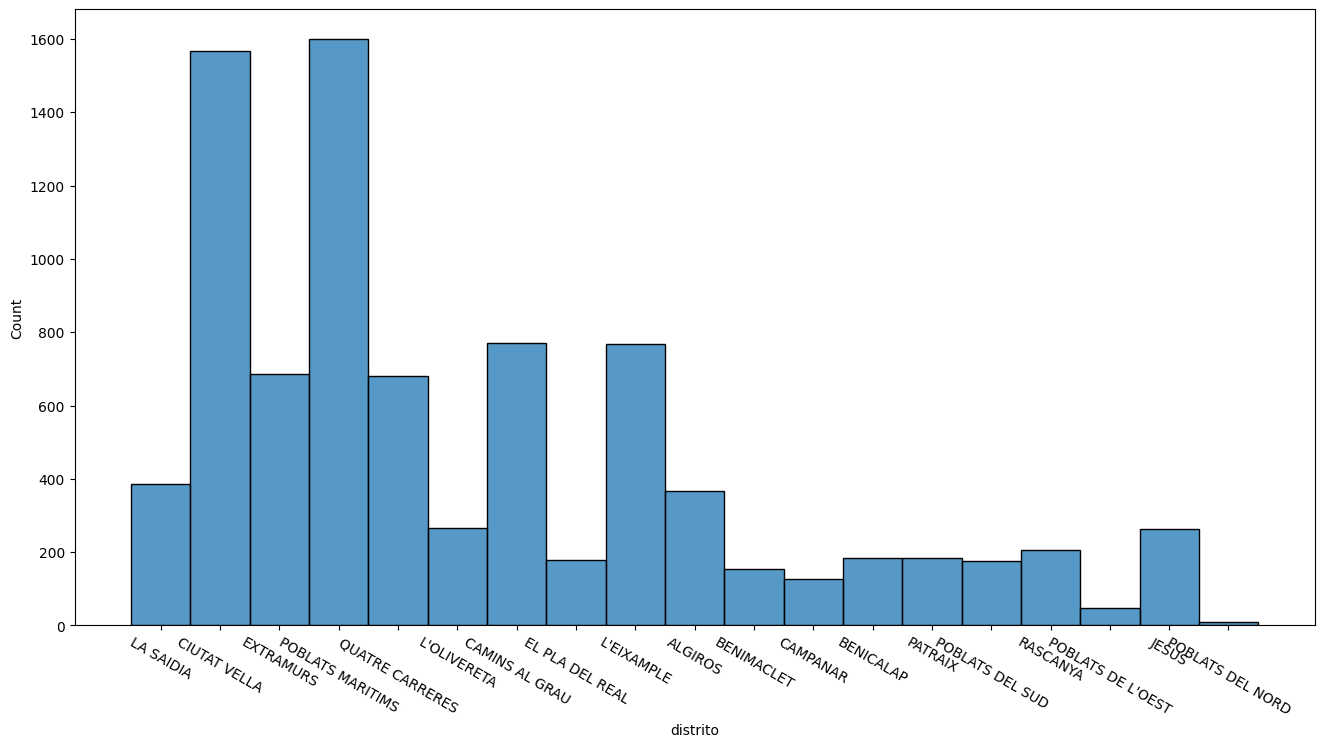

In [9]:
plt.figure(figsize=(16,8))
sns.histplot(data=airbnb,x='distrito')
plt.xticks(rotation=-30)
plt.show()

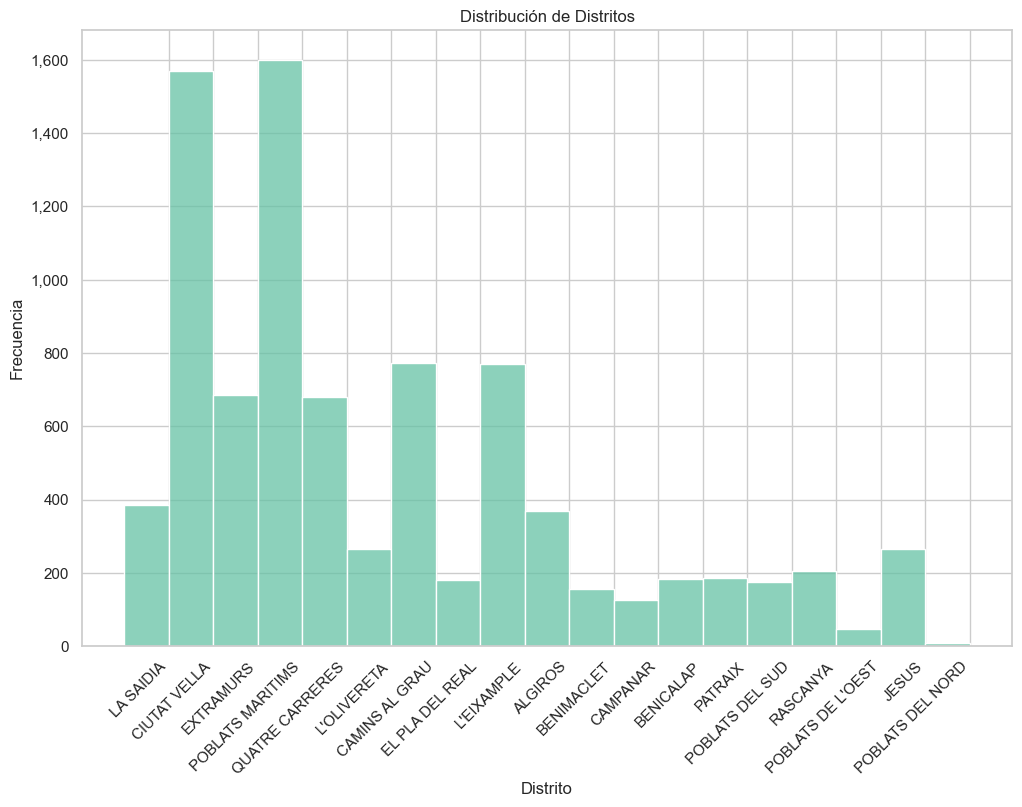

In [10]:
# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura
plt.figure(figsize=(12, 8))

# Personalizar colores y paleta
colors = sns.color_palette("Set2")

# Crear el gráfico de histograma
histplot = sns.histplot(data=airbnb, x='distrito', color=colors[0])

# Obtener las etiquetas de los distritos
distrito_labels = airbnb['distrito'].unique()

# Definir las posiciones de las etiquetas en el centro de las barras
bar_centers = [(i + 0.5) for i in range(len(distrito_labels))]

# Establecer las etiquetas en el centro de las barras
plt.xticks(bar_centers, distrito_labels, rotation=45, ha='right')

# Añadir título y etiquetas de ejes
plt.title('Distribución de Distritos')
plt.xlabel('Distrito')
plt.ylabel('Frecuencia')

# Añadir separadores de miles en el eje Y (si es necesario)
histplot.get_yaxis().set_major_formatter(FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Mostrar la trama
plt.show()

In [11]:
airbnb_solo_ap = airbnb[airbnb.loc[:,'tipo alojamiento'] == 'Entire home/apt']
airbnb_solo_ap['distrito'] = airbnb_solo_ap['distrito'].str.lower()
airbnb_solo_ap['barrio'] = airbnb_solo_ap['barrio'].str.lower()
airbnb_solo_ap['tipo alojamiento'] = airbnb_solo_ap['tipo alojamiento'].str.lower()
airbnb_solo_ap

C:\Users\funny\AppData\Local\Temp\ipykernel_24616\4245553443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_solo_ap['distrito'] = airbnb_solo_ap['distrito'].str.lower()
C:\Users\funny\AppData\Local\Temp\ipykernel_24616\4245553443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_solo_ap['barrio'] = airbnb_solo_ap['barrio'].str.lower()
C:\Users\funny\AppData\Local\Temp\ipykernel_24616\4245553443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min
0,la saidia,morvedre,39.483750,-0.375020,entire home/apt,89,4
1,ciutat vella,la seu,39.476580,-0.376540,entire home/apt,100,1
2,extramurs,arrancapins,39.459650,-0.384530,entire home/apt,171,3
3,poblats maritims,la malva-rosa,39.481970,-0.324560,entire home/apt,532,2
4,ciutat vella,el mercat,39.473580,-0.378150,entire home/apt,75,28
...,...,...,...,...,...,...,...
8610,poblats maritims,el grau,39.462483,-0.336221,entire home/apt,103,1
8612,camins al grau,albors,39.469412,-0.355203,entire home/apt,75,2
8616,quatre carreres,ciutat de les arts i de les ciencies,39.456290,-0.358480,entire home/apt,93,1
8625,ciutat vella,sant francesc,39.470253,-0.378285,entire home/apt,85,30


In [12]:
airbnb_solo_ap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5736 entries, 0 to 8626
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distrito          5736 non-null   object 
 1   barrio            5736 non-null   object 
 2   lat               5736 non-null   float64
 3   long              5736 non-null   float64
 4   tipo alojamiento  5736 non-null   object 
 5   precio/noche      5736 non-null   int64  
 6   noches_min        5736 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 358.5+ KB


In [13]:
airbnb_solo_ap.describe()

,lat,long,precio/noche,noches_min
count,5736.000000,5736.000000,5736.000000,5736.000000
mean,39.466694,-0.362463,142.763250,5.747559
std,0.024855,0.023887,222.318841,22.000271
min,39.279330,-0.427840,10.000000,1.000000
25%,39.462888,-0.379320,90.000000,1.000000
50%,39.469885,-0.371630,114.000000,2.000000
75%,39.475411,-0.339687,150.000000,4.000000
max,39.547770,-0.276100,6286.000000,1125.000000


In [14]:
airbnb_solo_ap['precio final'] = airbnb_solo_ap['precio/noche'] * airbnb_solo_ap['noches_min']
airbnb_solo_ap

C:\Users\funny\AppData\Local\Temp\ipykernel_24616\1063064896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_solo_ap['precio final'] = airbnb_solo_ap['precio/noche'] * airbnb_solo_ap['noches_min']


,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
0,la saidia,morvedre,39.483750,-0.375020,entire home/apt,89,4,356
1,ciutat vella,la seu,39.476580,-0.376540,entire home/apt,100,1,100
2,extramurs,arrancapins,39.459650,-0.384530,entire home/apt,171,3,513
3,poblats maritims,la malva-rosa,39.481970,-0.324560,entire home/apt,532,2,1064
4,ciutat vella,el mercat,39.473580,-0.378150,entire home/apt,75,28,2100
...,...,...,...,...,...,...,...,...
8610,poblats maritims,el grau,39.462483,-0.336221,entire home/apt,103,1,103
8612,camins al grau,albors,39.469412,-0.355203,entire home/apt,75,2,150
8616,quatre carreres,ciutat de les arts i de les ciencies,39.456290,-0.358480,entire home/apt,93,1,93
8625,ciutat vella,sant francesc,39.470253,-0.378285,entire home/apt,85,30,2550


In [15]:
msk1= airbnb_solo_ap.loc[:,'distrito'].isin(['poblats del sud']) 
msk2= airbnb_solo_ap.loc[:,'distrito'].isin(["poblats de l'oest"])
msk3= airbnb_solo_ap.loc[:,'distrito'].isin(['poblats del nord'])
msk_comb = msk1 | msk2 | msk3
airbnb_ap_y_dist = airbnb_solo_ap.loc[~msk_comb]

airbnb_ap_y_dist

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
0,la saidia,morvedre,39.483750,-0.375020,entire home/apt,89,4,356
1,ciutat vella,la seu,39.476580,-0.376540,entire home/apt,100,1,100
2,extramurs,arrancapins,39.459650,-0.384530,entire home/apt,171,3,513
3,poblats maritims,la malva-rosa,39.481970,-0.324560,entire home/apt,532,2,1064
4,ciutat vella,el mercat,39.473580,-0.378150,entire home/apt,75,28,2100
...,...,...,...,...,...,...,...,...
8610,poblats maritims,el grau,39.462483,-0.336221,entire home/apt,103,1,103
8612,camins al grau,albors,39.469412,-0.355203,entire home/apt,75,2,150
8616,quatre carreres,ciutat de les arts i de les ciencies,39.456290,-0.358480,entire home/apt,93,1,93
8625,ciutat vella,sant francesc,39.470253,-0.378285,entire home/apt,85,30,2550


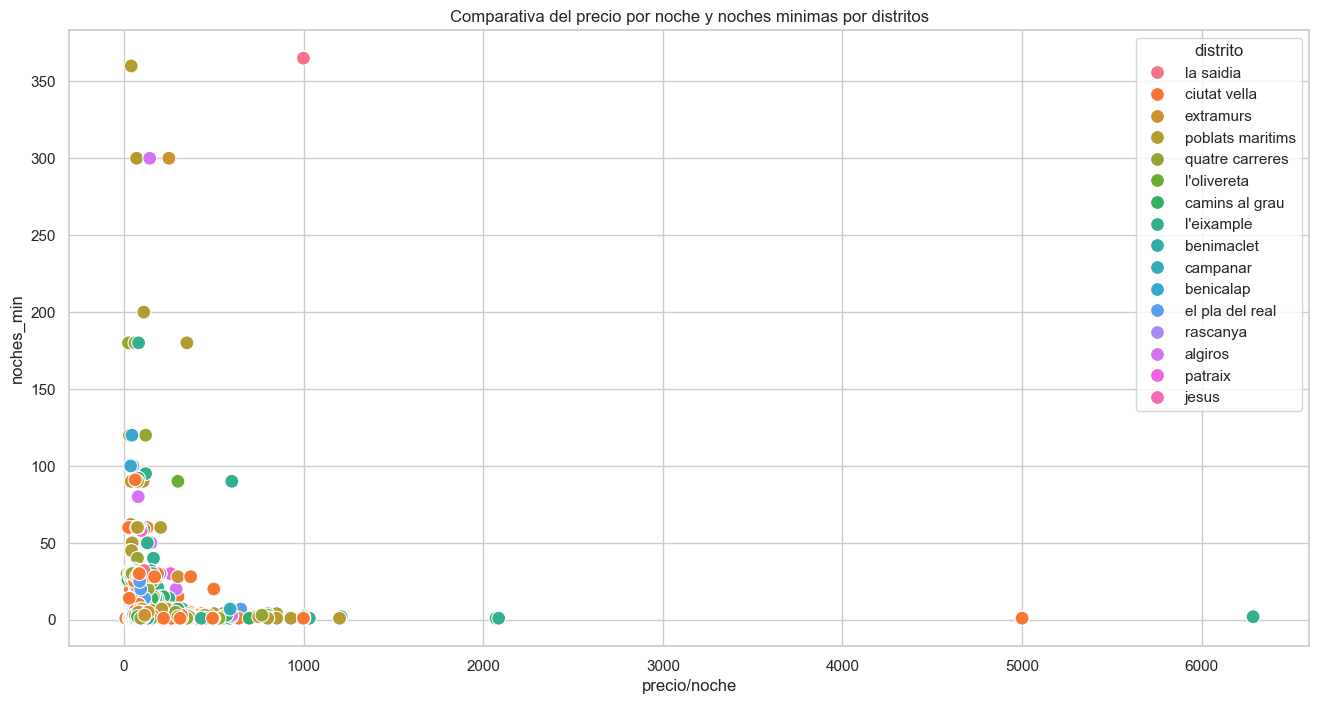

In [16]:
plt.figure(figsize=(16,8))

sns.scatterplot(x=airbnb_ap_y_dist ['precio/noche'],
                y=airbnb_ap_y_dist ['noches_min'],
                hue = airbnb_ap_y_dist ['distrito'],
               s=100,)
plt.title('Comparativa del precio por noche y noches minimas por distritos')
plt.show()

C:\Users\funny\AppData\Local\Temp\ipykernel_24616\2250526603.py:13: UserWarning: 
The palette list has fewer values (8) than needed (16) and will cycle, which may produce an uninterpretable plot.
  scatterplot = sns.scatterplot(


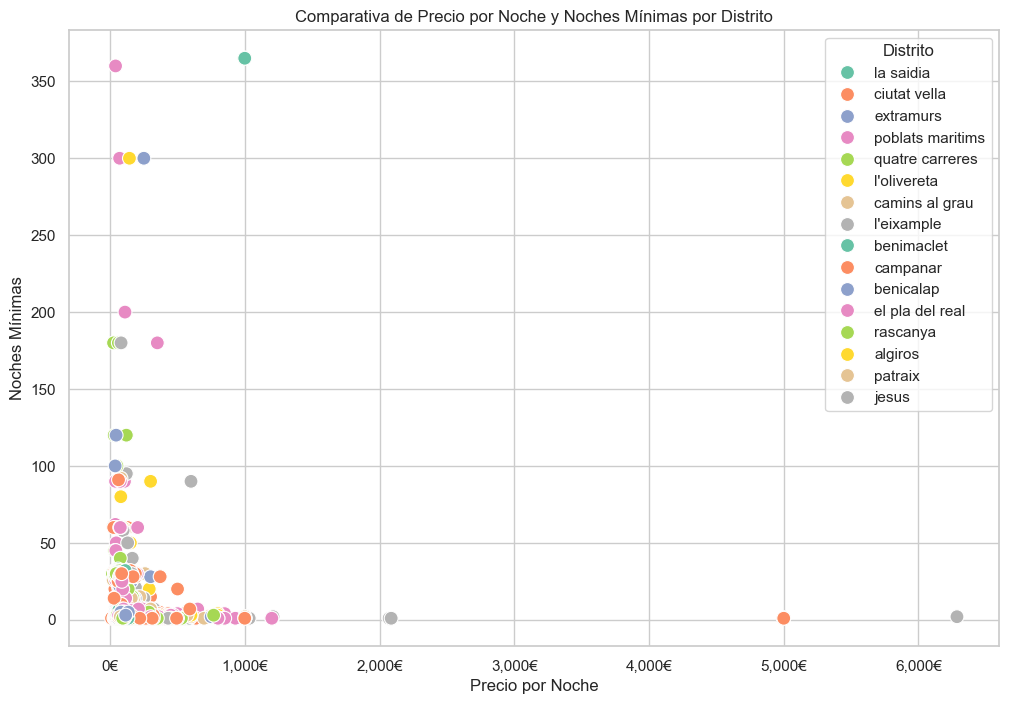

In [17]:
#mejora con ChatGPT

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura
plt.figure(figsize=(12, 8))

# Personalizar colores y paleta
colors = sns.color_palette("Set2")

# Crear el gráfico de dispersión
scatterplot = sns.scatterplot(
    x=airbnb_ap_y_dist['precio/noche'],
    y=airbnb_ap_y_dist['noches_min'],
    hue=airbnb_ap_y_dist['distrito'],
    s=100,
    palette=colors
)

# Añadir título y etiquetas de ejes
plt.title('Comparativa de Precio por Noche y Noches Mínimas por Distrito')
plt.xlabel('Precio por Noche')
plt.ylabel('Noches Mínimas')

# Personalizar la leyenda
plt.legend(title='Distrito')

# Añadir separadores de miles en el eje X
scatterplot.get_xaxis().set_major_formatter(FuncFormatter(lambda x, loc: "{:,}€".format(int(x))))

# Mostrar la trama
plt.show()



In [18]:
msk1= airbnb_solo_ap.loc[:,'distrito'].isin(['poblats del sud']) 
msk2= airbnb_solo_ap.loc[:,'distrito'].isin(["poblats de l'oest"])
msk3= airbnb_solo_ap.loc[:,'distrito'].isin(['poblats del nord'])
msk4 = airbnb_solo_ap.loc[:,'noches_min']>30
msk_comb = msk1 | msk2 | msk3 | msk4
airbnb_bruto_f = airbnb_solo_ap.loc[~msk_comb]

airbnb_bruto_f

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
0,la saidia,morvedre,39.483750,-0.375020,entire home/apt,89,4,356
1,ciutat vella,la seu,39.476580,-0.376540,entire home/apt,100,1,100
2,extramurs,arrancapins,39.459650,-0.384530,entire home/apt,171,3,513
3,poblats maritims,la malva-rosa,39.481970,-0.324560,entire home/apt,532,2,1064
4,ciutat vella,el mercat,39.473580,-0.378150,entire home/apt,75,28,2100
...,...,...,...,...,...,...,...,...
8610,poblats maritims,el grau,39.462483,-0.336221,entire home/apt,103,1,103
8612,camins al grau,albors,39.469412,-0.355203,entire home/apt,75,2,150
8616,quatre carreres,ciutat de les arts i de les ciencies,39.456290,-0.358480,entire home/apt,93,1,93
8625,ciutat vella,sant francesc,39.470253,-0.378285,entire home/apt,85,30,2550


In [19]:
airbnb_bruto_f.loc[:,'distrito'].unique()

array(['la saidia', 'ciutat vella', 'extramurs', 'poblats maritims',
       "l'olivereta", 'camins al grau', 'quatre carreres', "l'eixample",
       'benimaclet', 'campanar', 'benicalap', 'el pla del real',
       'rascanya', 'algiros', 'patraix', 'jesus'], dtype=object)

In [20]:
# grupos = airbnb_solo_ap.groupby('distrito')

# for distrito in grupos:
#     distrito = grupos.get_group(distrito)

In [21]:
grupos = airbnb_bruto_f.groupby('distrito')
la_saidia = grupos.get_group('la saidia')
ciutat_vella = grupos.get_group('ciutat vella')
extramurs = grupos.get_group('extramurs')
poblats_maritims = grupos.get_group('poblats maritims')
quatre_carreres = grupos.get_group('quatre carreres')
l_olivereta = grupos.get_group("l'olivereta")
camins_al_grau = grupos.get_group('camins al grau')
l_eixample = grupos.get_group("l'eixample")
benimaclet = grupos.get_group('benimaclet')
campanar = grupos.get_group('campanar')
benicalap = grupos.get_group('benicalap')
el_pla = grupos.get_group('el pla del real')
jesus = grupos.get_group('jesus')
algiros = grupos.get_group('algiros')
patraix = grupos.get_group('patraix')
rascanya = grupos.get_group('rascanya')

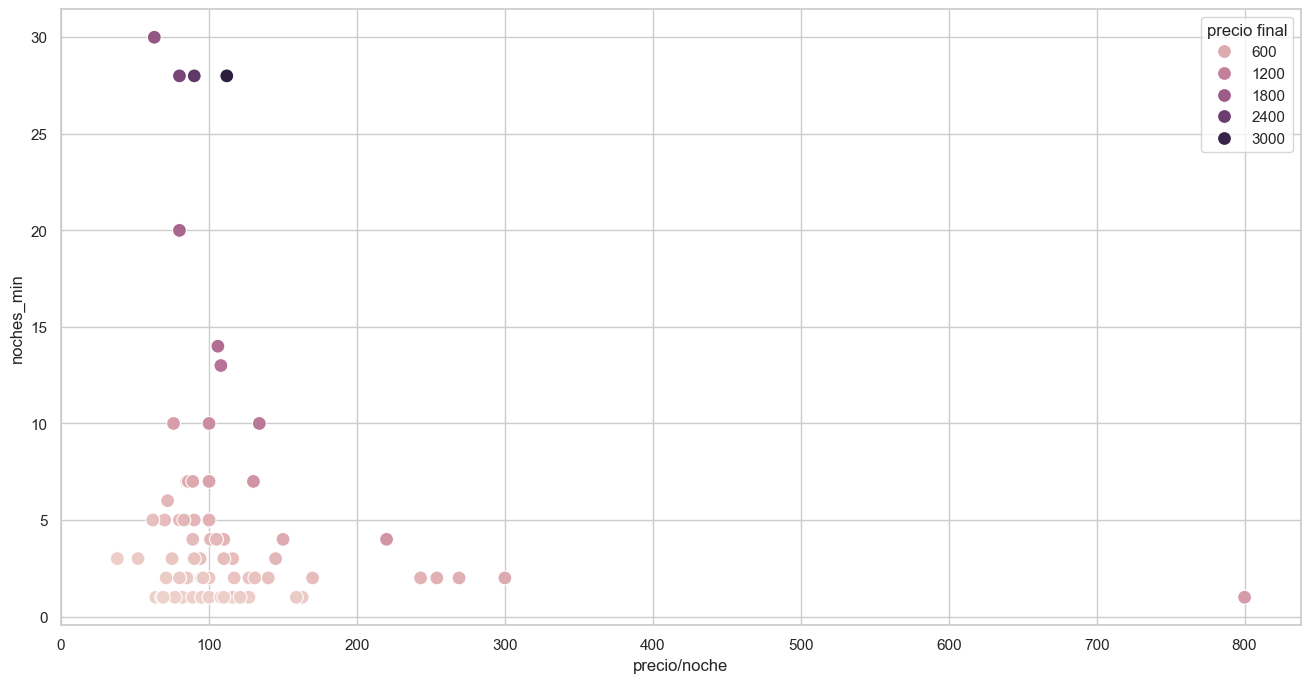

In [22]:
plt.figure(figsize=(16,8))

sns.scatterplot(x=rascanya['precio/noche'],
                y=rascanya['noches_min'],
                hue = rascanya['precio final'],
               s=100,)
plt.show()

In [23]:
la_saidia.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
2159,la saidia,morvedre,39.482040,-0.373430,entire home/apt,500,3,1500
741,la saidia,marxalenes,39.482550,-0.379910,entire home/apt,454,2,908
1600,la saidia,sant antoni,39.490710,-0.374610,entire home/apt,350,1,350
4291,la saidia,morvedre,39.483320,-0.375950,entire home/apt,338,2,676
176,la saidia,morvedre,39.483270,-0.375260,entire home/apt,300,2,600
...,...,...,...,...,...,...,...,...
6229,la saidia,tormos,39.489706,-0.381475,entire home/apt,48,1,48
960,la saidia,sant antoni,39.486690,-0.375600,entire home/apt,46,4,184
4030,la saidia,marxalenes,39.483864,-0.381576,entire home/apt,44,15,660
1068,la saidia,marxalenes,39.488280,-0.385680,entire home/apt,43,2,86


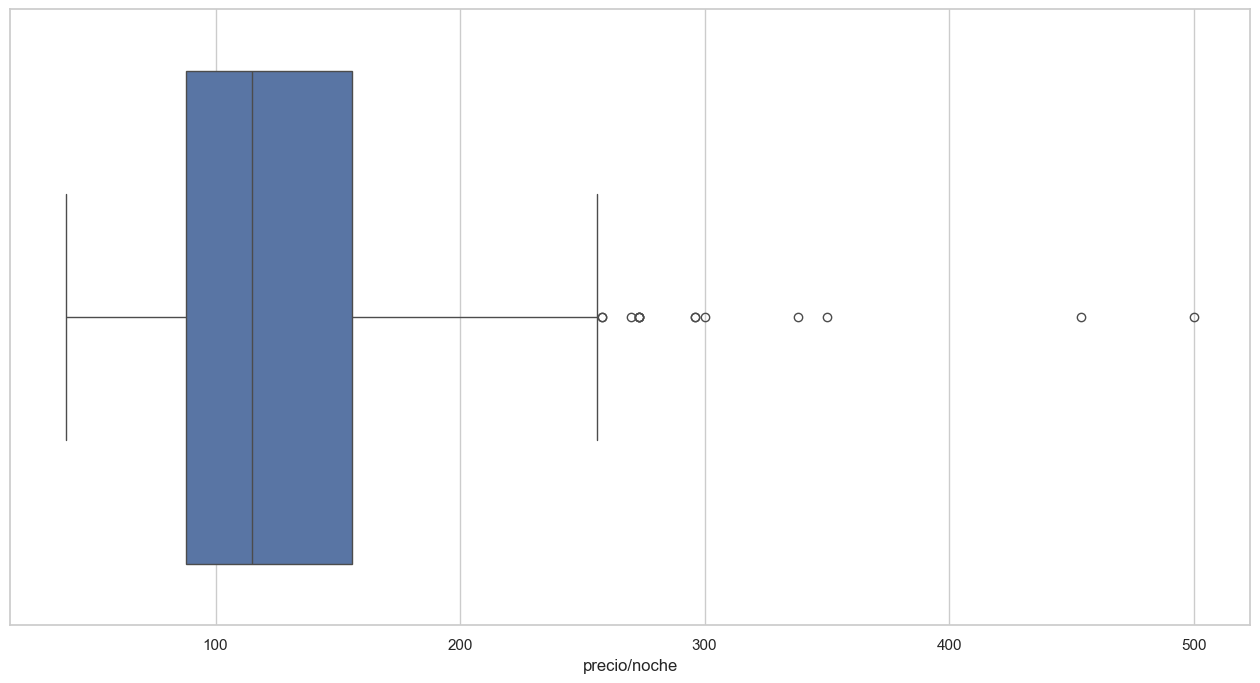

In [24]:
plt.figure(figsize=(16,8))
sns.boxplot(la_saidia["precio/noche"], orient='h')
plt.show()

In [25]:
extramurs.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
503,extramurs,la roqueta,39.469340,-0.383300,entire home/apt,1014,2,2028
5747,extramurs,el botanic,39.472845,-0.384255,entire home/apt,750,2,1500
534,extramurs,arrancapins,39.463420,-0.383710,entire home/apt,391,3,1173
3820,extramurs,el botanic,39.474121,-0.386182,entire home/apt,375,1,375
4435,extramurs,arrancapins,39.461670,-0.378720,entire home/apt,367,1,367
...,...,...,...,...,...,...,...,...
79,extramurs,arrancapins,39.468420,-0.386740,entire home/apt,50,5,250
127,extramurs,el botanic,39.475730,-0.385420,entire home/apt,50,2,100
4260,extramurs,arrancapins,39.458520,-0.383310,entire home/apt,49,30,1470
521,extramurs,arrancapins,39.467410,-0.382920,entire home/apt,45,2,90


In [26]:
extramurs.loc[:,'precio/noche'].sort_values().iloc[0:-2].mean()

124.41825902335457

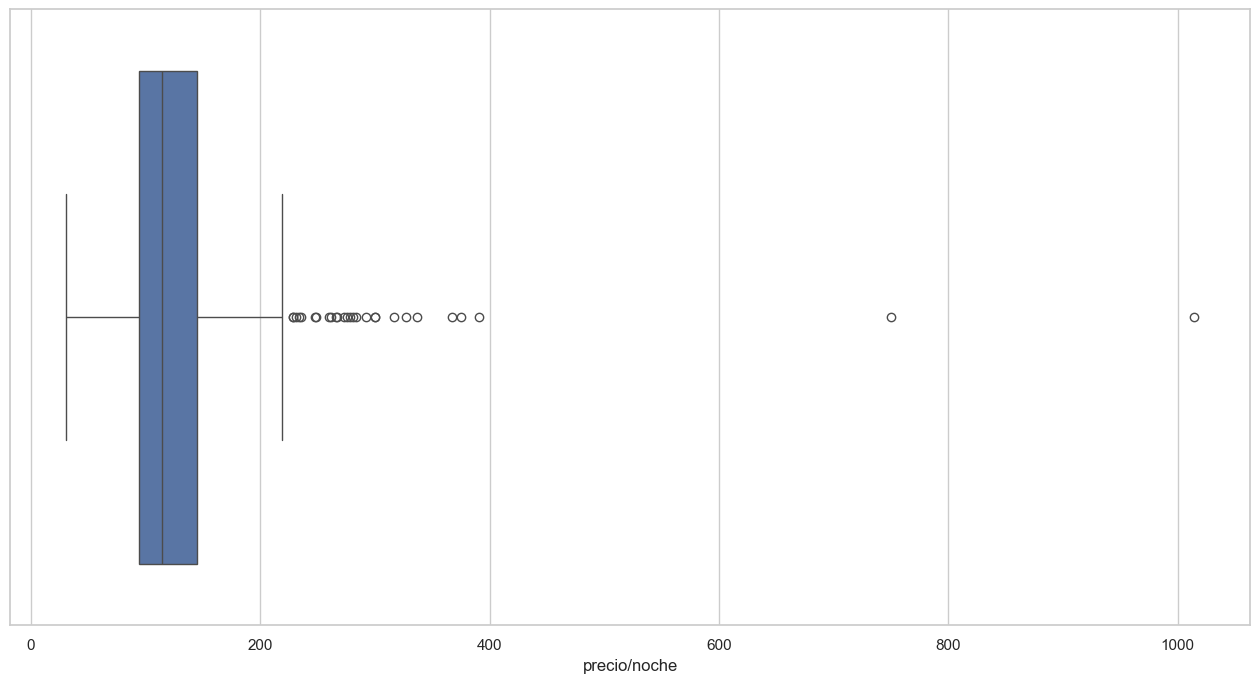

In [27]:
plt.figure(figsize=(16,8))
sns.boxplot(extramurs["precio/noche"], orient='h')
plt.show()

In [28]:
ciutat_vella.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
1909,ciutat vella,la seu,39.476560,-0.378760,entire home/apt,5000,1,5000
1893,ciutat vella,el carme,39.478150,-0.377450,entire home/apt,5000,1,5000
1894,ciutat vella,el carme,39.478210,-0.377030,entire home/apt,5000,1,5000
1897,ciutat vella,el carme,39.477300,-0.379230,entire home/apt,5000,1,5000
1900,ciutat vella,el carme,39.477290,-0.377140,entire home/apt,5000,1,5000
...,...,...,...,...,...,...,...,...
4466,ciutat vella,la seu,39.475880,-0.374880,entire home/apt,37,1,37
2496,ciutat vella,la seu,39.476110,-0.377590,entire home/apt,35,20,700
9,ciutat vella,el mercat,39.473370,-0.377800,entire home/apt,30,28,840
8397,ciutat vella,la xerea,39.476771,-0.371988,entire home/apt,29,14,406


In [29]:
ciutat_vella.sort_values(by='precio/noche', ascending = False).head(10)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
1909,ciutat vella,la seu,39.47656,-0.37876,entire home/apt,5000,1,5000
1893,ciutat vella,el carme,39.47815,-0.37745,entire home/apt,5000,1,5000
1894,ciutat vella,el carme,39.47821,-0.37703,entire home/apt,5000,1,5000
1897,ciutat vella,el carme,39.47730,-0.37923,entire home/apt,5000,1,5000
1900,ciutat vella,el carme,39.47729,-0.37714,entire home/apt,5000,1,5000
1904,ciutat vella,el carme,39.47818,-0.37888,entire home/apt,5000,1,5000
2056,ciutat vella,el carme,39.47791,-0.37718,entire home/apt,5000,1,5000
2054,ciutat vella,el carme,39.47847,-0.37717,entire home/apt,5000,1,5000
216,ciutat vella,el carme,39.47704,-0.38262,entire home/apt,1200,1,1200
356,ciutat vella,el mercat,39.47528,-0.38074,entire home/apt,1000,2,2000


In [30]:
ciutat_vella_f = ciutat_vella[ciutat_vella.loc[:,'precio/noche'] != 5000]
ciutat_vella_f.sort_values(by='precio/noche', ascending = False).head(10)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
216,ciutat vella,el carme,39.477040,-0.382620,entire home/apt,1200,1,1200
356,ciutat vella,el mercat,39.475280,-0.380740,entire home/apt,1000,2,2000
7548,ciutat vella,el mercat,39.472784,-0.378858,entire home/apt,999,1,999
3392,ciutat vella,sant francesc,39.470350,-0.376530,entire home/apt,810,1,810
3393,ciutat vella,sant francesc,39.470100,-0.374850,entire home/apt,810,1,810
3796,ciutat vella,el mercat,39.474670,-0.378790,entire home/apt,729,2,1458
4417,ciutat vella,sant francesc,39.471330,-0.379110,entire home/apt,637,1,637
3836,ciutat vella,el mercat,39.471920,-0.377630,entire home/apt,561,2,1122
3289,ciutat vella,la xerea,39.475710,-0.371300,entire home/apt,550,4,2200
3798,ciutat vella,la seu,39.474630,-0.374320,entire home/apt,549,2,1098


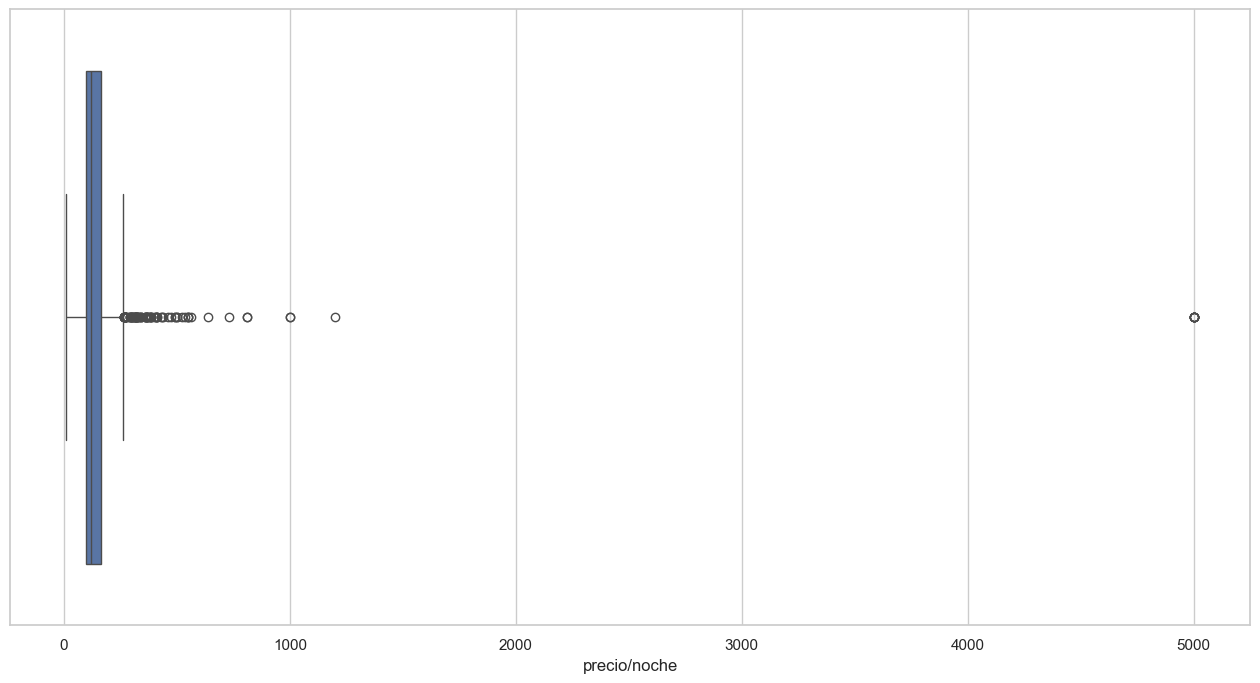

In [31]:
plt.figure(figsize=(16,8))
sns.boxplot(ciutat_vella["precio/noche"], orient='h')
plt.show()

In [32]:
poblats_maritims.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
6813,poblats maritims,el grau,39.428411,-0.333076,entire home/apt,1200,1,1200
4980,poblats maritims,cabanyal-canyamelar,39.471210,-0.326050,entire home/apt,929,1,929
486,poblats maritims,la malva-rosa,39.476250,-0.325130,entire home/apt,850,4,3400
5358,poblats maritims,cabanyal-canyamelar,39.472117,-0.325327,entire home/apt,850,1,850
6361,poblats maritims,cabanyal-canyamelar,39.468460,-0.326100,entire home/apt,800,1,800
...,...,...,...,...,...,...,...,...
3273,poblats maritims,cabanyal-canyamelar,39.464660,-0.328560,entire home/apt,40,4,160
6016,poblats maritims,cabanyal-canyamelar,39.469390,-0.332539,entire home/apt,39,1,39
6015,poblats maritims,cabanyal-canyamelar,39.469771,-0.330580,entire home/apt,37,1,37
3525,poblats maritims,cabanyal-canyamelar,39.471240,-0.333720,entire home/apt,36,28,1008


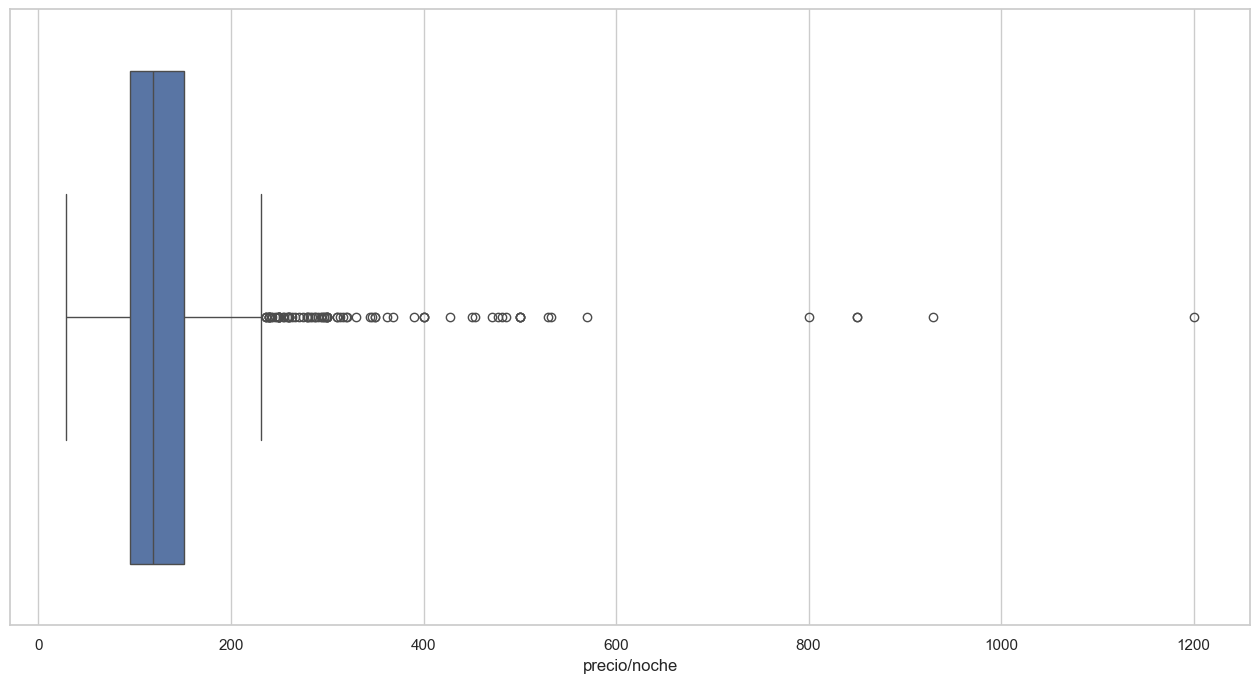

In [33]:
plt.figure(figsize=(16,8))
sns.boxplot(poblats_maritims["precio/noche"], orient='h')
plt.show()

In [34]:
quatre_carreres.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
8051,quatre carreres,ciutat de les arts i de les ciencies,39.455263,-0.358703,entire home/apt,768,3,2304
3312,quatre carreres,ciutat de les arts i de les ciencies,39.454628,-0.359206,entire home/apt,614,2,1228
3266,quatre carreres,ciutat de les arts i de les ciencies,39.454210,-0.359060,entire home/apt,577,1,577
3263,quatre carreres,ciutat de les arts i de les ciencies,39.455910,-0.357280,entire home/apt,572,1,572
6126,quatre carreres,na rovella,39.454118,-0.363269,entire home/apt,529,1,529
...,...,...,...,...,...,...,...,...
7490,quatre carreres,en corts,39.454447,-0.371598,entire home/apt,45,30,1350
7854,quatre carreres,mont-olivet,39.459730,-0.364326,entire home/apt,40,29,1160
3961,quatre carreres,la punta,39.451620,-0.335310,entire home/apt,33,28,924
4700,quatre carreres,la punta,39.449100,-0.336040,entire home/apt,30,1,30


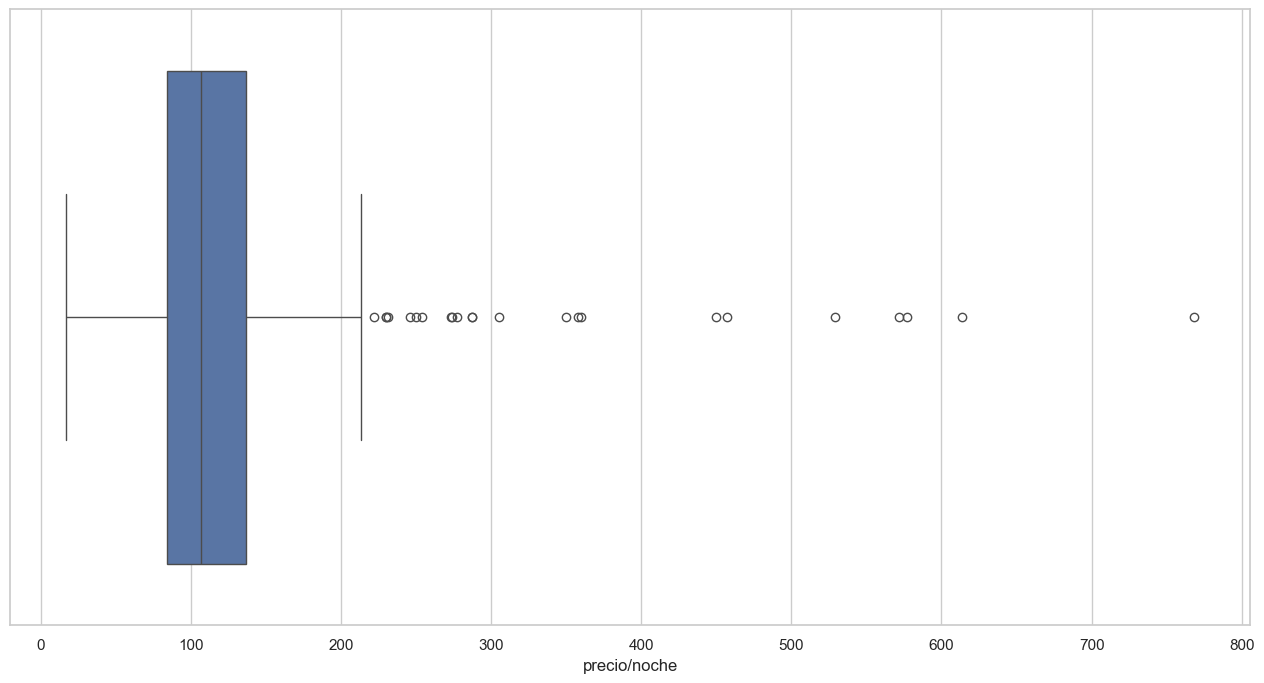

In [35]:
plt.figure(figsize=(16,8))
sns.boxplot(quatre_carreres["precio/noche"], orient='h')
plt.show()

In [36]:
l_olivereta.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
4162,l'olivereta,nou moles,39.473061,-0.406194,entire home/apt,1000,1,1000
1872,l'olivereta,nou moles,39.470400,-0.392580,entire home/apt,800,4,3200
1913,l'olivereta,nou moles,39.469240,-0.392790,entire home/apt,800,3,2400
6337,l'olivereta,soternes,39.471372,-0.408794,entire home/apt,279,3,837
1657,l'olivereta,nou moles,39.471810,-0.394710,entire home/apt,240,6,1440
...,...,...,...,...,...,...,...,...
8087,l'olivereta,nou moles,39.468586,-0.395884,entire home/apt,55,2,110
1293,l'olivereta,nou moles,39.473070,-0.398150,entire home/apt,55,5,275
7022,l'olivereta,nou moles,39.469802,-0.399585,entire home/apt,49,1,49
10,l'olivereta,nou moles,39.467590,-0.390670,entire home/apt,49,6,294


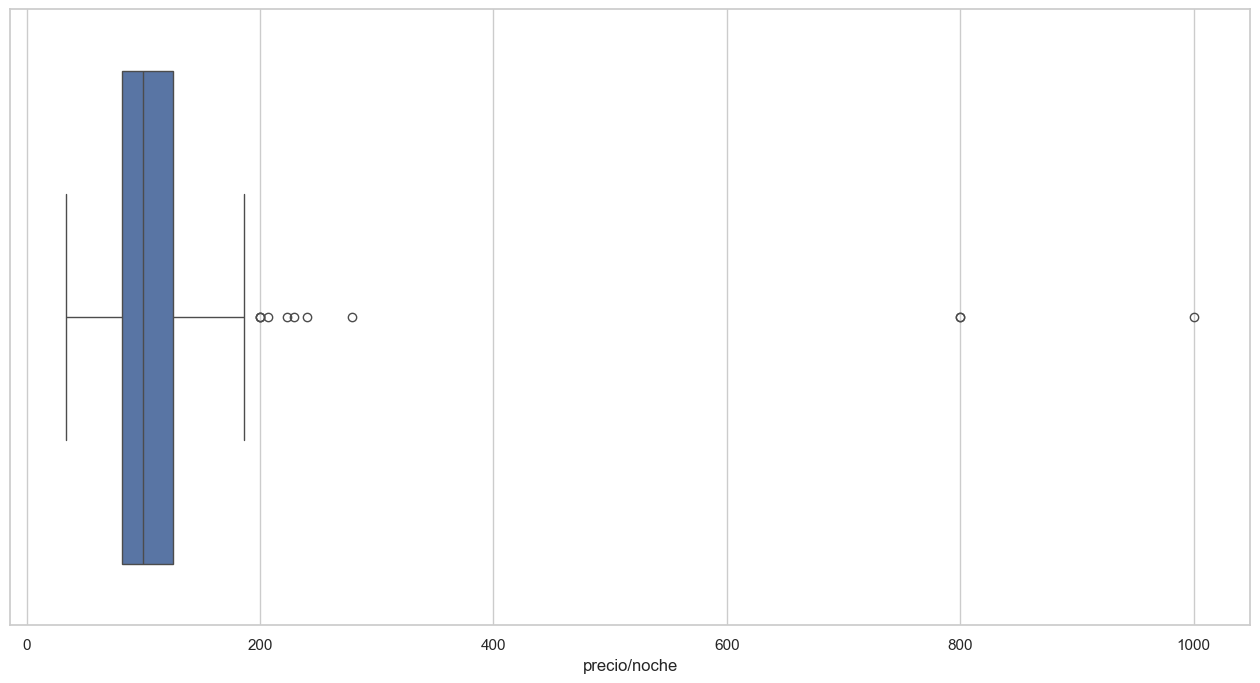

In [37]:
plt.figure(figsize=(16,8))
sns.boxplot(l_olivereta["precio/noche"], orient='h')
plt.show()

In [38]:
camins_al_grau.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
5539,camins al grau,aiora,39.466730,-0.347730,entire home/apt,1000,2,2000
2665,camins al grau,cami fondo,39.465710,-0.354370,entire home/apt,1000,1,1000
7317,camins al grau,aiora,39.464734,-0.338393,entire home/apt,999,1,999
3019,camins al grau,aiora,39.465618,-0.348653,entire home/apt,771,2,1542
4468,camins al grau,cami fondo,39.466440,-0.354580,entire home/apt,697,1,697
...,...,...,...,...,...,...,...,...
1533,camins al grau,la creu del grau,39.461770,-0.345250,entire home/apt,41,28,1148
1736,camins al grau,albors,39.468940,-0.353050,entire home/apt,40,5,200
1042,camins al grau,aiora,39.467990,-0.345570,entire home/apt,39,1,39
1513,camins al grau,la creu del grau,39.461870,-0.345780,entire home/apt,38,28,1064


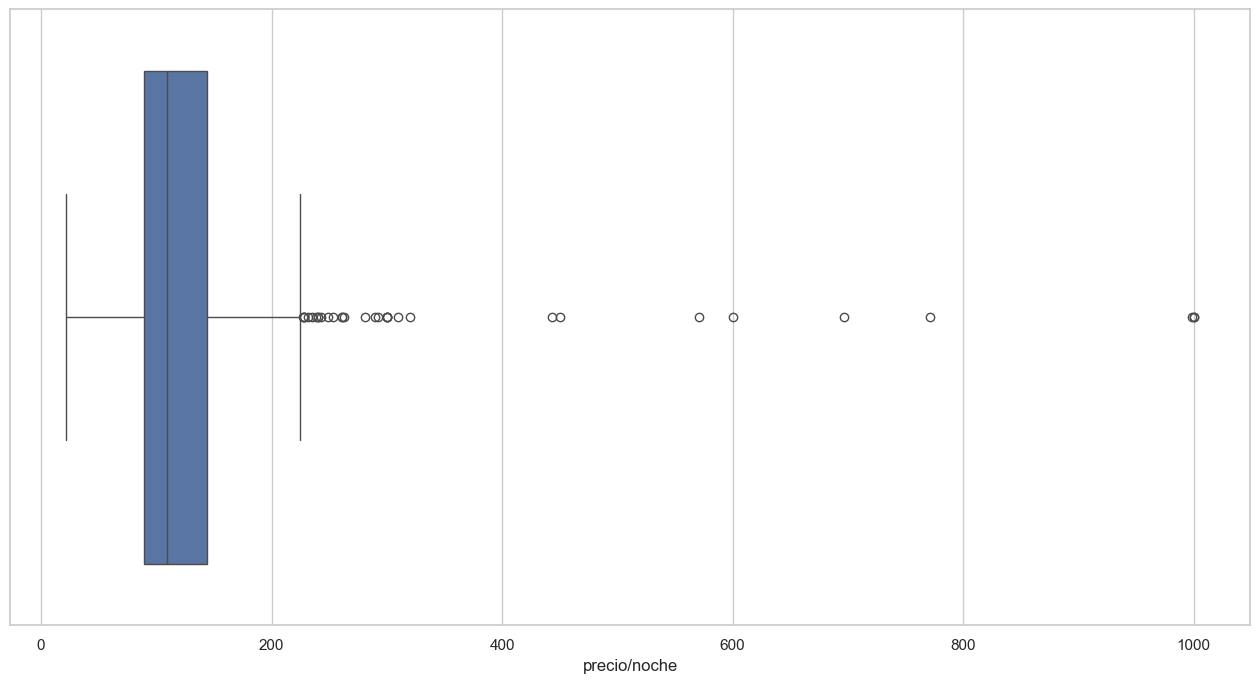

In [39]:
plt.figure(figsize=(16,8))
sns.boxplot(camins_al_grau["precio/noche"], orient='h')
plt.show()

In [40]:
l_eixample.sort_values(by='precio/noche', ascending = False)


,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
1590,l'eixample,russafa,39.46151,-0.37067,entire home/apt,6286,2,12572
1710,l'eixample,el pla del remei,39.46711,-0.36922,entire home/apt,2086,1,2086
1606,l'eixample,el pla del remei,39.46858,-0.36772,entire home/apt,2071,1,2071
1773,l'eixample,el pla del remei,39.46716,-0.36872,entire home/apt,1209,2,2418
1424,l'eixample,russafa,39.46220,-0.37652,entire home/apt,1032,1,1032
...,...,...,...,...,...,...,...,...
3309,l'eixample,russafa,39.46078,-0.36878,entire home/apt,47,3,141
4047,l'eixample,russafa,39.46050,-0.37221,entire home/apt,36,30,1080
2259,l'eixample,russafa,39.46253,-0.37478,entire home/apt,35,1,35
332,l'eixample,russafa,39.46269,-0.37460,entire home/apt,35,30,1050


In [41]:
l_eixample = l_eixample[l_eixample.loc[:,'precio/noche'] < 2000]
l_eixample.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
1773,l'eixample,el pla del remei,39.46716,-0.36872,entire home/apt,1209,2,2418
1424,l'eixample,russafa,39.46220,-0.37652,entire home/apt,1032,1,1032
4445,l'eixample,russafa,39.46205,-0.37801,entire home/apt,588,1,588
4440,l'eixample,russafa,39.46030,-0.37700,entire home/apt,550,1,550
1385,l'eixample,russafa,39.46312,-0.36973,entire home/apt,517,1,517
...,...,...,...,...,...,...,...,...
3309,l'eixample,russafa,39.46078,-0.36878,entire home/apt,47,3,141
4047,l'eixample,russafa,39.46050,-0.37221,entire home/apt,36,30,1080
2259,l'eixample,russafa,39.46253,-0.37478,entire home/apt,35,1,35
332,l'eixample,russafa,39.46269,-0.37460,entire home/apt,35,30,1050


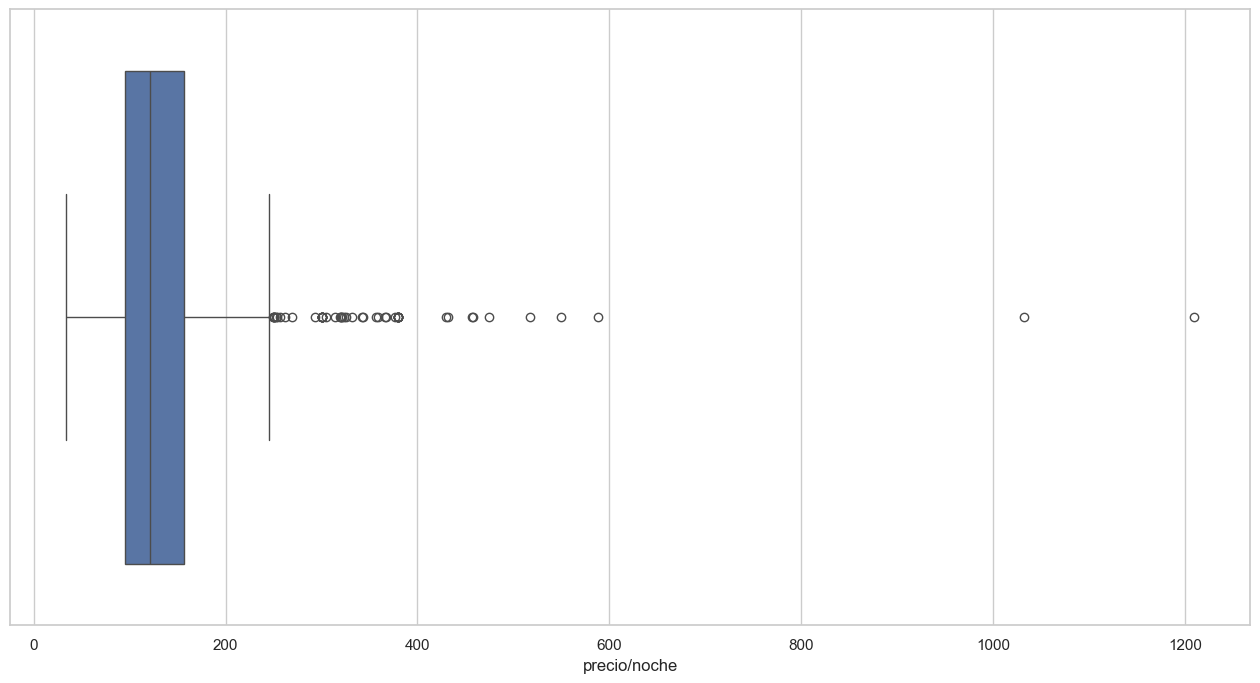

In [42]:
plt.figure(figsize=(16,8))
sns.boxplot(l_eixample["precio/noche"], orient='h')
plt.show()

In [43]:
benimaclet.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
1839,benimaclet,benimaclet,39.486250,-0.356530,entire home/apt,500,3,1500
6519,benimaclet,benimaclet,39.478963,-0.354369,entire home/apt,243,3,729
6516,benimaclet,benimaclet,39.485201,-0.362760,entire home/apt,243,3,729
1704,benimaclet,benimaclet,39.485750,-0.357960,entire home/apt,203,2,406
2827,benimaclet,benimaclet,39.489150,-0.366230,entire home/apt,200,15,3000
...,...,...,...,...,...,...,...,...
4918,benimaclet,benimaclet,39.485180,-0.362664,entire home/apt,60,2,120
34,benimaclet,benimaclet,39.485190,-0.362020,entire home/apt,56,2,112
572,benimaclet,cami de vera,39.490860,-0.358750,entire home/apt,55,3,165
3081,benimaclet,cami de vera,39.487030,-0.356920,entire home/apt,55,3,165


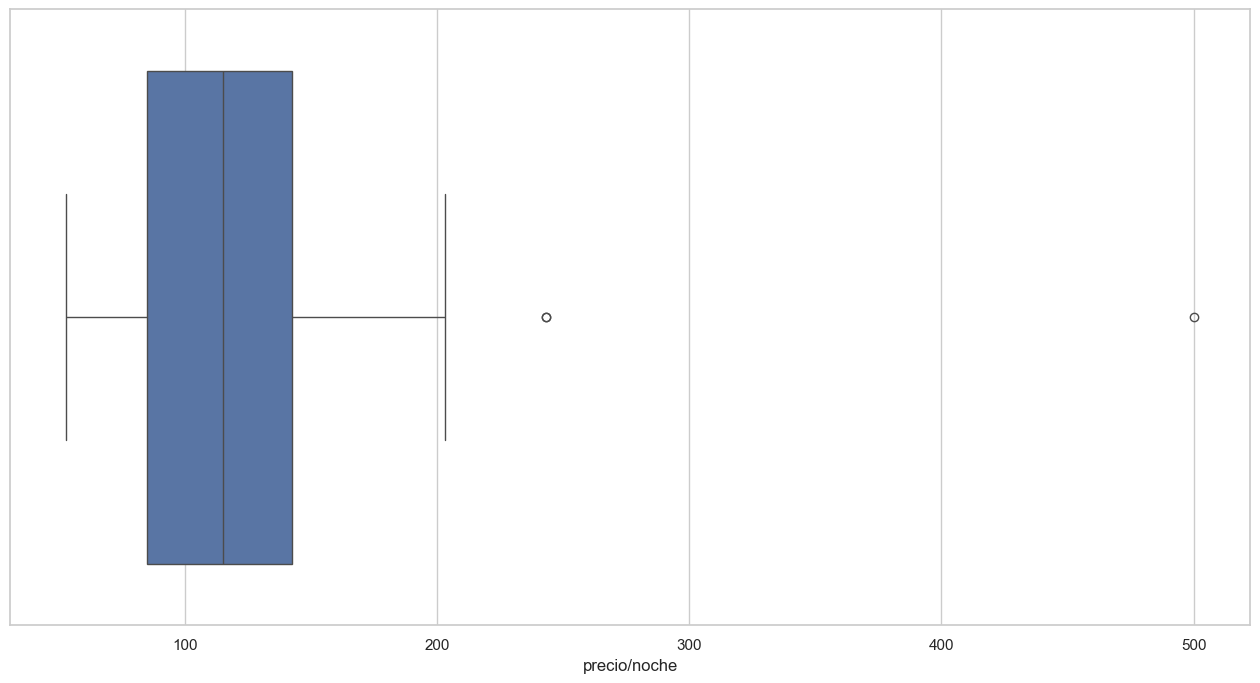

In [44]:
plt.figure(figsize=(16,8))
sns.boxplot(benimaclet["precio/noche"], orient='h')
plt.show()

In [45]:
campanar.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
6948,campanar,sant pau,39.490760,-0.399780,entire home/apt,591,7,4137
57,campanar,sant pau,39.490380,-0.404330,entire home/apt,253,3,759
7644,campanar,sant pau,39.474926,-0.404040,entire home/apt,226,1,226
5968,campanar,campanar,39.480893,-0.393900,entire home/apt,220,3,660
7643,campanar,sant pau,39.474339,-0.403346,entire home/apt,211,1,211
...,...,...,...,...,...,...,...,...
1319,campanar,les tendetes,39.482910,-0.384710,entire home/apt,57,2,114
7929,campanar,les tendetes,39.484769,-0.386044,entire home/apt,56,30,1680
1781,campanar,les tendetes,39.485346,-0.387677,entire home/apt,55,28,1540
7489,campanar,sant pau,39.483710,-0.402160,entire home/apt,52,2,104


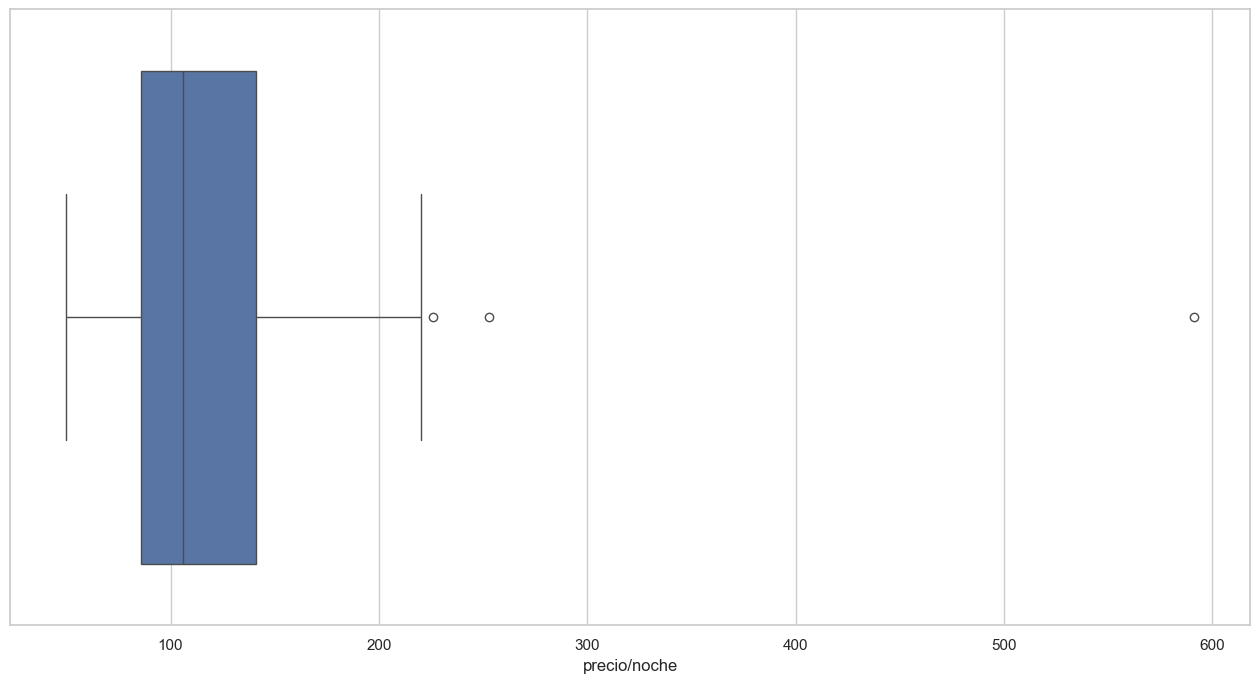

In [46]:
plt.figure(figsize=(16,8))
sns.boxplot(campanar["precio/noche"], orient='h')
plt.show()

In [47]:
benicalap.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
6607,benicalap,benicalap,39.492076,-0.400095,entire home/apt,218,1,218
6204,benicalap,ciutat fallera,39.498880,-0.399000,entire home/apt,208,2,416
4789,benicalap,benicalap,39.496091,-0.391416,entire home/apt,200,3,600
6297,benicalap,benicalap,39.490785,-0.389348,entire home/apt,189,2,378
4675,benicalap,benicalap,39.488400,-0.390150,entire home/apt,186,14,2604
...,...,...,...,...,...,...,...,...
6779,benicalap,benicalap,39.493170,-0.393240,entire home/apt,50,6,300
6488,benicalap,ciutat fallera,39.499465,-0.394514,entire home/apt,50,4,200
6401,benicalap,benicalap,39.494112,-0.390353,entire home/apt,49,7,343
6884,benicalap,benicalap,39.494334,-0.390767,entire home/apt,45,7,315


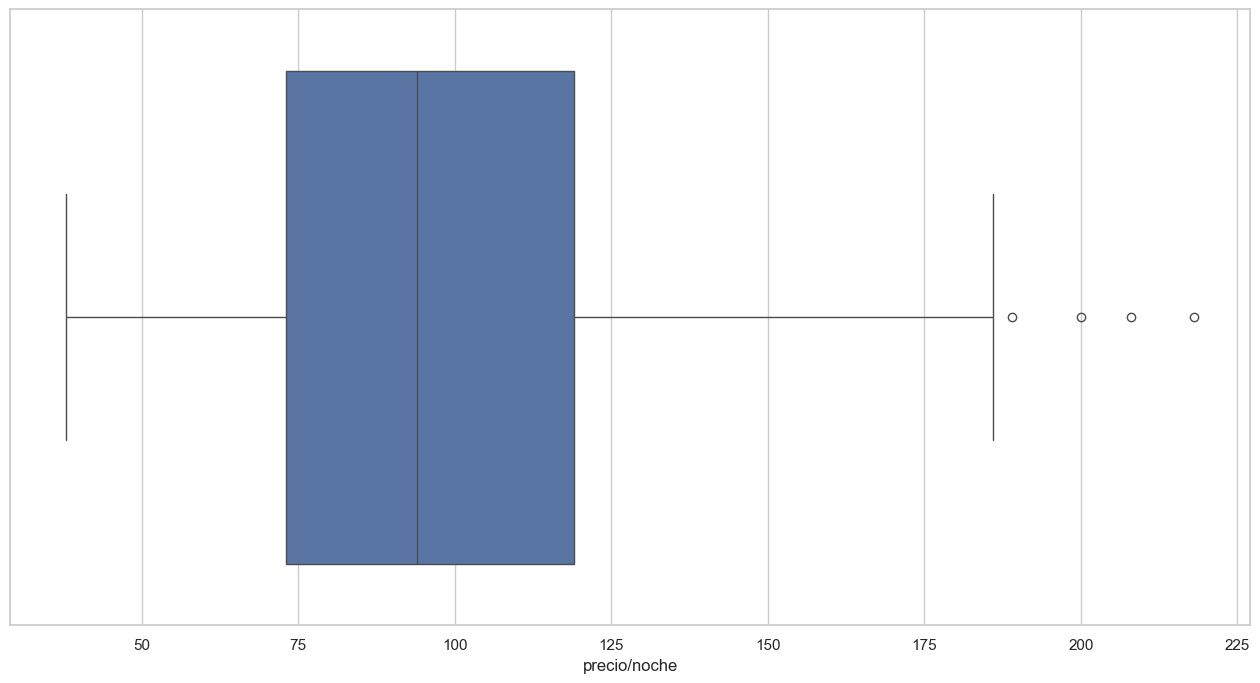

In [48]:
plt.figure(figsize=(16,8))
sns.boxplot(benicalap["precio/noche"], orient='h')
plt.show()

In [49]:
campanar.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
6948,campanar,sant pau,39.490760,-0.399780,entire home/apt,591,7,4137
57,campanar,sant pau,39.490380,-0.404330,entire home/apt,253,3,759
7644,campanar,sant pau,39.474926,-0.404040,entire home/apt,226,1,226
5968,campanar,campanar,39.480893,-0.393900,entire home/apt,220,3,660
7643,campanar,sant pau,39.474339,-0.403346,entire home/apt,211,1,211
...,...,...,...,...,...,...,...,...
1319,campanar,les tendetes,39.482910,-0.384710,entire home/apt,57,2,114
7929,campanar,les tendetes,39.484769,-0.386044,entire home/apt,56,30,1680
1781,campanar,les tendetes,39.485346,-0.387677,entire home/apt,55,28,1540
7489,campanar,sant pau,39.483710,-0.402160,entire home/apt,52,2,104


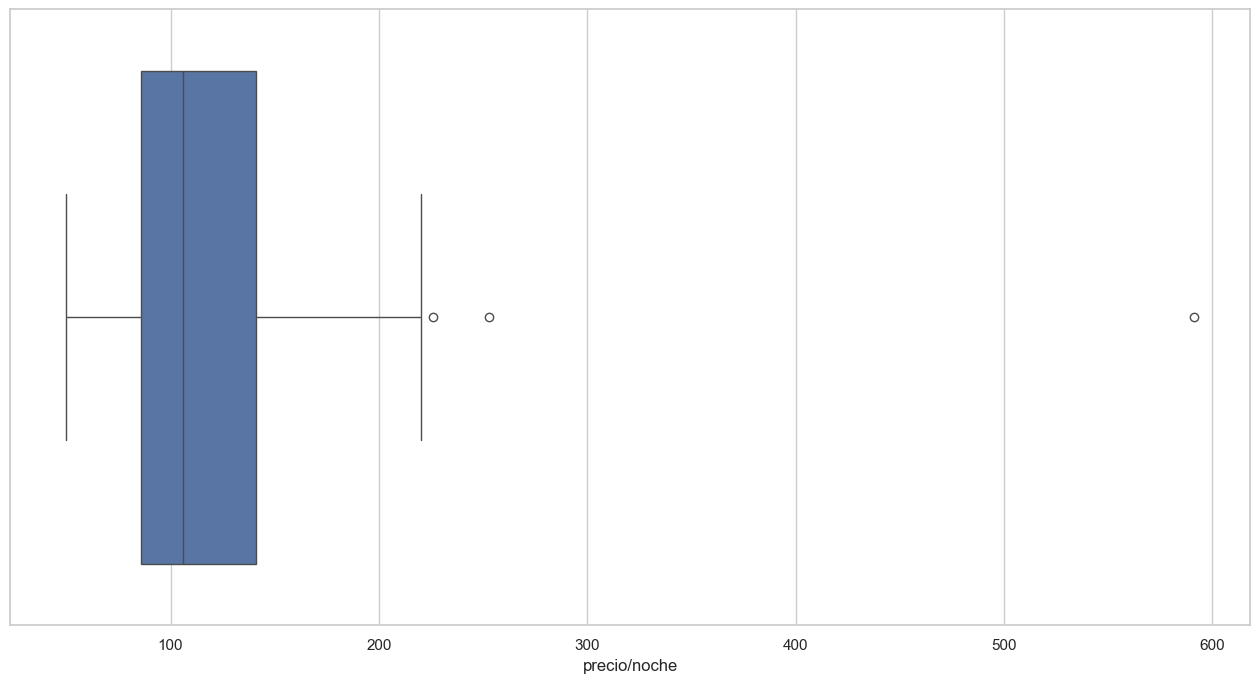

In [50]:
plt.figure(figsize=(16,8))
sns.boxplot(campanar["precio/noche"], orient='h')
plt.show()

In [51]:
benicalap.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
6607,benicalap,benicalap,39.492076,-0.400095,entire home/apt,218,1,218
6204,benicalap,ciutat fallera,39.498880,-0.399000,entire home/apt,208,2,416
4789,benicalap,benicalap,39.496091,-0.391416,entire home/apt,200,3,600
6297,benicalap,benicalap,39.490785,-0.389348,entire home/apt,189,2,378
4675,benicalap,benicalap,39.488400,-0.390150,entire home/apt,186,14,2604
...,...,...,...,...,...,...,...,...
6779,benicalap,benicalap,39.493170,-0.393240,entire home/apt,50,6,300
6488,benicalap,ciutat fallera,39.499465,-0.394514,entire home/apt,50,4,200
6401,benicalap,benicalap,39.494112,-0.390353,entire home/apt,49,7,343
6884,benicalap,benicalap,39.494334,-0.390767,entire home/apt,45,7,315


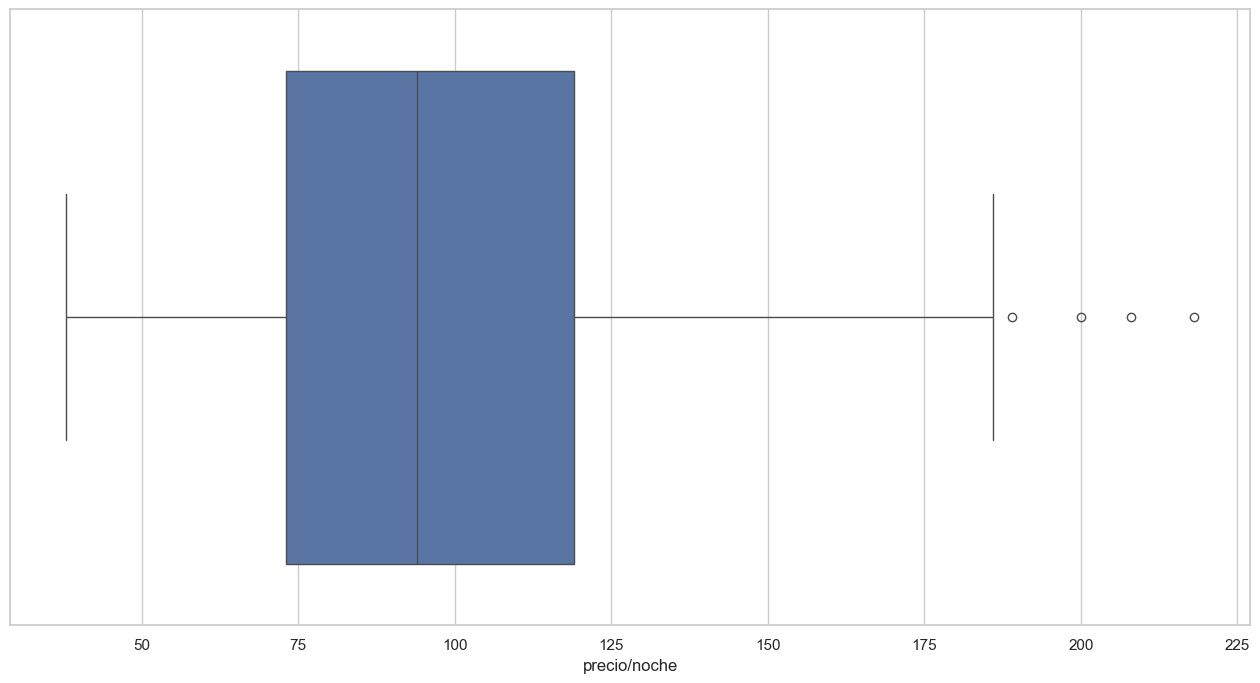

In [52]:
plt.figure(figsize=(16,8))
sns.boxplot(benicalap["precio/noche"], orient='h')
plt.show()

In [53]:
el_pla.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
3960,el pla del real,mestalla,39.466923,-0.357985,entire home/apt,1000,1,1000
2984,el pla del real,mestalla,39.467070,-0.357250,entire home/apt,650,7,4550
6726,el pla del real,mestalla,39.468600,-0.357193,entire home/apt,264,4,1056
117,el pla del real,mestalla,39.472910,-0.353760,entire home/apt,261,4,1044
8030,el pla del real,mestalla,39.473750,-0.354710,entire home/apt,232,3,696
...,...,...,...,...,...,...,...,...
8430,el pla del real,jaume roig,39.482428,-0.361635,entire home/apt,75,2,150
3593,el pla del real,mestalla,39.472890,-0.356400,entire home/apt,67,9,603
4586,el pla del real,mestalla,39.474350,-0.355490,entire home/apt,60,2,120
3191,el pla del real,jaume roig,39.482610,-0.362810,entire home/apt,56,1,56


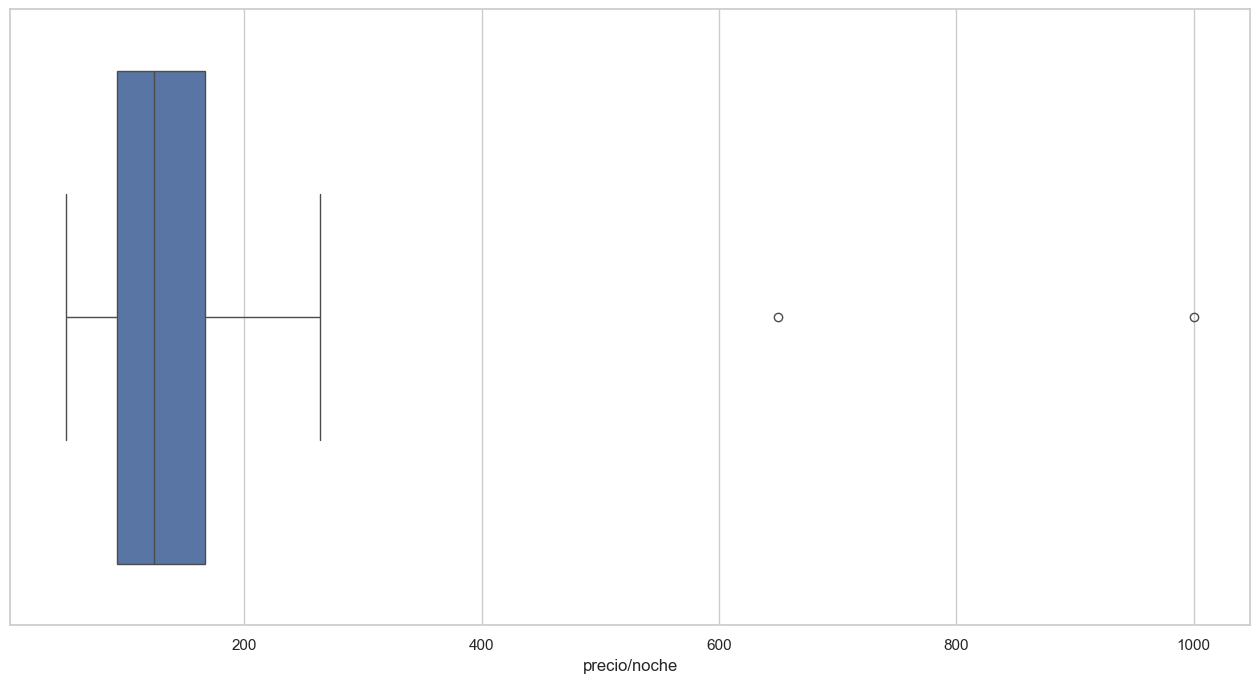

In [54]:
plt.figure(figsize=(16,8))
sns.boxplot(el_pla["precio/noche"], orient='h')
plt.show()

In [55]:
jesus.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
2389,jesus,l'hort de senabre,39.454200,-0.38657,entire home/apt,310,3,930
5433,jesus,l'hort de senabre,39.455500,-0.38949,entire home/apt,307,3,921
7224,jesus,cami real,39.444302,-0.38698,entire home/apt,300,1,300
1783,jesus,sant marcel.li,39.444740,-0.38968,entire home/apt,258,1,258
6621,jesus,la creu coberta,39.449821,-0.38593,entire home/apt,243,3,729
...,...,...,...,...,...,...,...,...
1387,jesus,la creu coberta,39.450200,-0.38409,entire home/apt,46,1,46
5269,jesus,sant marcel.li,39.445410,-0.38900,entire home/apt,45,3,135
3831,jesus,sant marcel.li,39.445360,-0.39175,entire home/apt,45,3,135
1745,jesus,la raiosa,39.455870,-0.38816,entire home/apt,42,1,42


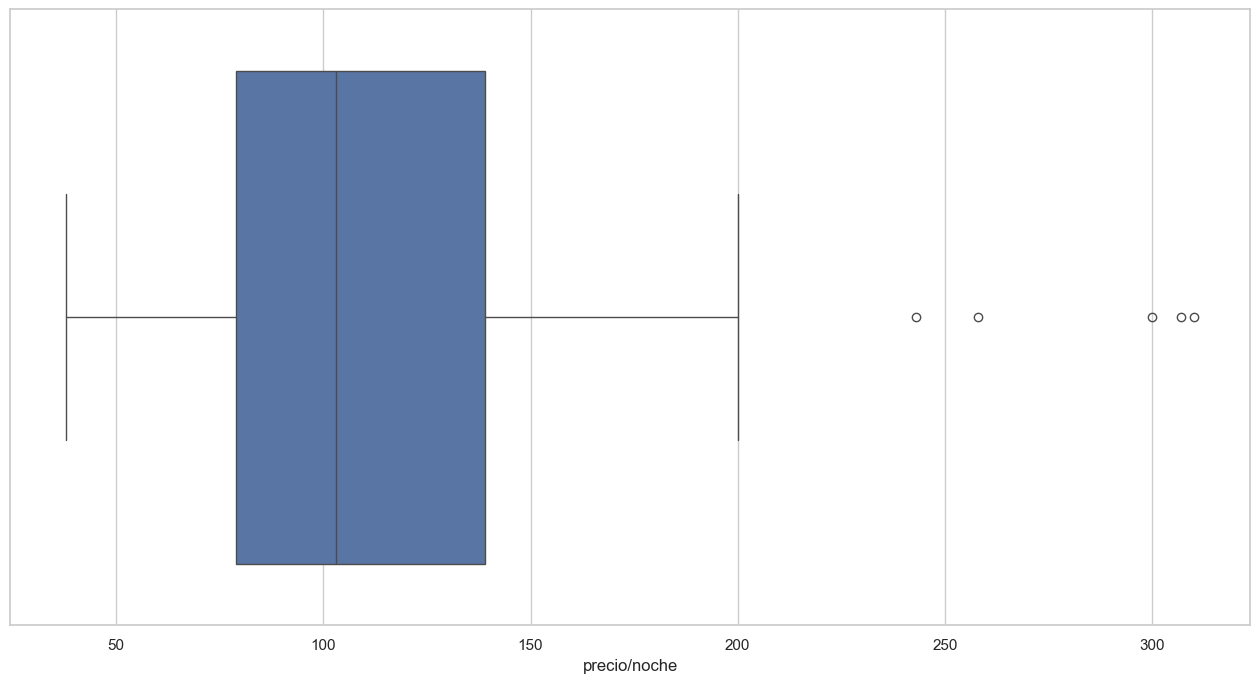

In [56]:
plt.figure(figsize=(16,8))
sns.boxplot(jesus["precio/noche"], orient='h')
plt.show()

In [57]:
algiros.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
4792,algiros,ciutat jardi,39.471310,-0.346770,entire home/apt,600,3,1800
5164,algiros,l'amistat,39.473110,-0.348870,entire home/apt,360,3,1080
4610,algiros,l'amistat,39.472340,-0.353730,entire home/apt,330,3,990
5123,algiros,ciutat jardi,39.472880,-0.347610,entire home/apt,300,3,900
5233,algiros,ciutat jardi,39.470880,-0.347390,entire home/apt,299,3,897
...,...,...,...,...,...,...,...,...
775,algiros,ciutat jardi,39.472750,-0.345970,entire home/apt,53,1,53
2081,algiros,l'amistat,39.472370,-0.352120,entire home/apt,52,2,104
2724,algiros,ciutat jardi,39.472320,-0.344530,entire home/apt,51,5,255
3078,algiros,ciutat jardi,39.469680,-0.347430,entire home/apt,48,2,96


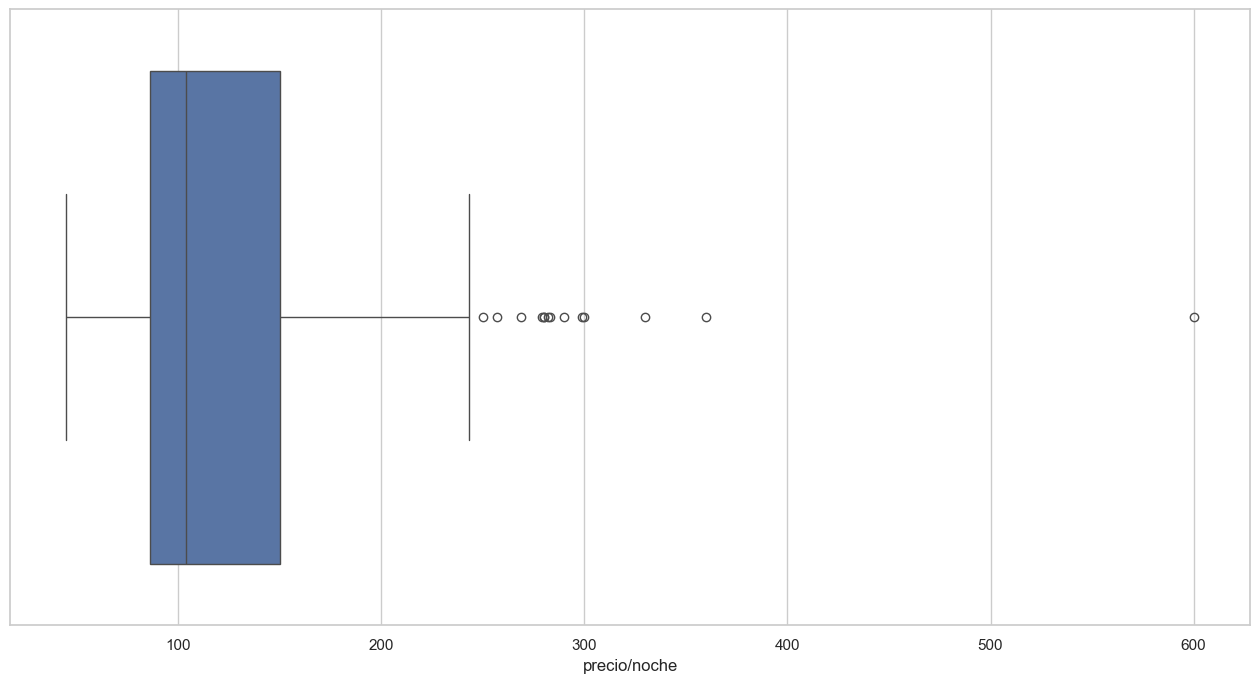

In [58]:
plt.figure(figsize=(16,8))
sns.boxplot(algiros["precio/noche"], orient='h')
plt.show()

In [59]:
patraix.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
635,patraix,patraix,39.45930,-0.39249,entire home/apt,1014,1,1014
1199,patraix,vara de quart,39.46038,-0.41279,entire home/apt,259,30,7770
8104,patraix,patraix,39.46567,-0.38937,entire home/apt,234,2,468
4322,patraix,patraix,39.46462,-0.38856,entire home/apt,225,5,1125
4766,patraix,patraix,39.45801,-0.39030,entire home/apt,220,6,1320
...,...,...,...,...,...,...,...,...
4087,patraix,vara de quart,39.46124,-0.41366,entire home/apt,57,7,399
987,patraix,patraix,39.46094,-0.38851,entire home/apt,45,1,45
963,patraix,patraix,39.46229,-0.38787,entire home/apt,45,2,90
951,patraix,safranar,39.45885,-0.39318,entire home/apt,43,7,301


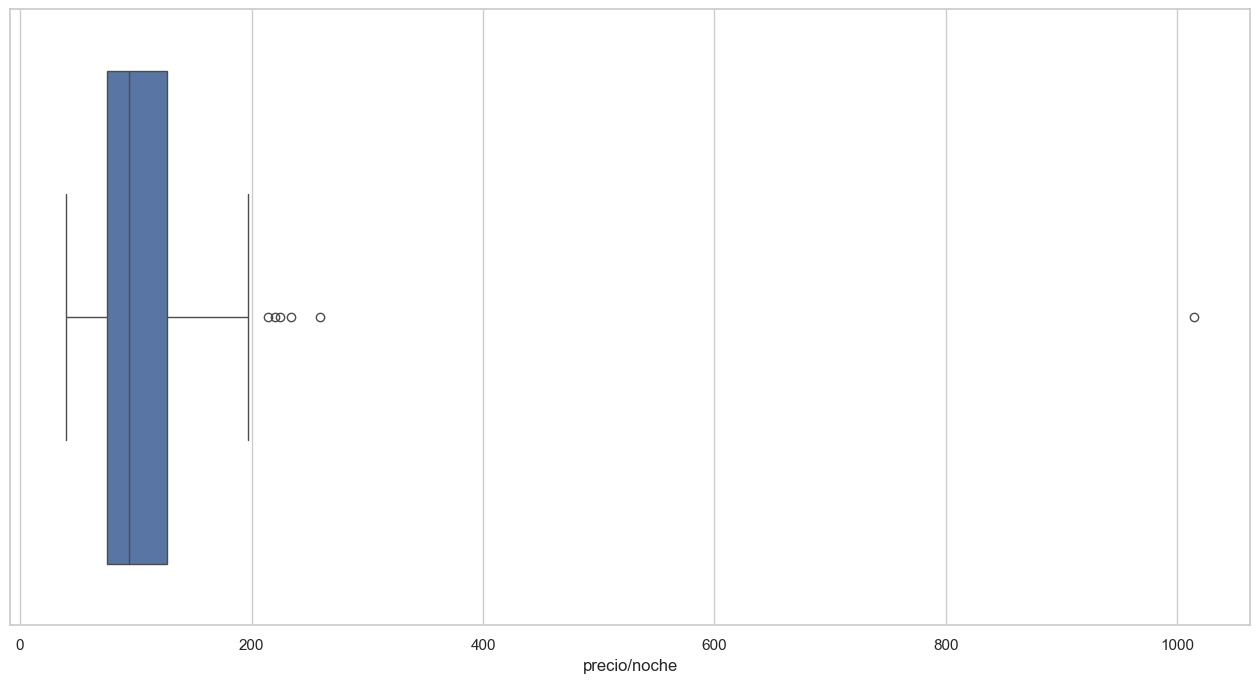

In [60]:
plt.figure(figsize=(16,8))
sns.boxplot(patraix["precio/noche"], orient='h')
plt.show()

In [61]:
rascanya.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
6356,rascanya,sant llorens,39.491654,-0.359068,entire home/apt,800,1,800
5317,rascanya,sant llorens,39.493480,-0.361608,entire home/apt,300,2,600
6631,rascanya,sant llorens,39.493431,-0.362841,entire home/apt,269,2,538
4725,rascanya,sant llorens,39.490422,-0.363656,entire home/apt,254,2,508
4748,rascanya,els orriols,39.494287,-0.369006,entire home/apt,243,2,486
...,...,...,...,...,...,...,...,...
5945,rascanya,sant llorens,39.488856,-0.364303,entire home/apt,64,1,64
5650,rascanya,sant llorens,39.489440,-0.361950,entire home/apt,63,30,1890
5029,rascanya,torrefiel,39.496790,-0.374670,entire home/apt,62,5,310
8438,rascanya,torrefiel,39.493264,-0.375844,entire home/apt,52,3,156


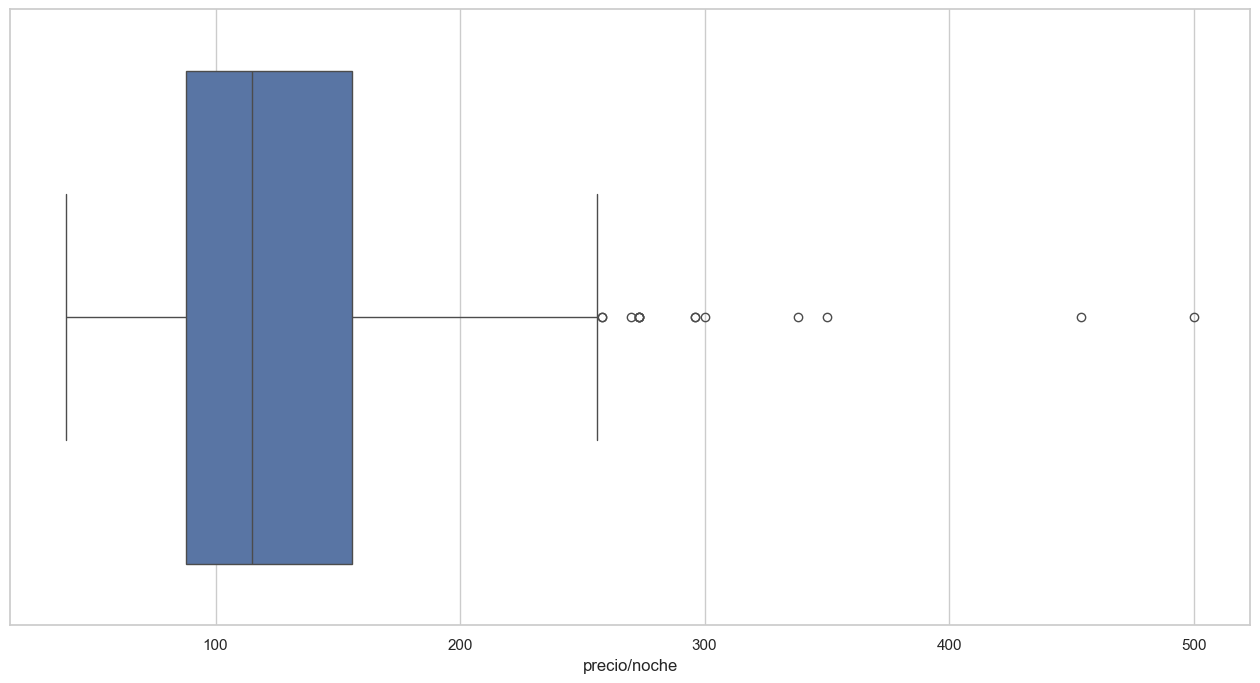

In [62]:
plt.figure(figsize=(16,8))
sns.boxplot(la_saidia["precio/noche"], orient='h')
plt.show()

In [63]:
airbnb_final= pd.concat([algiros,benicalap,benimaclet,camins_al_grau,campanar,ciutat_vella_f,el_pla,extramurs,jesus,l_eixample,l_olivereta,la_saidia,patraix,poblats_maritims,quatre_carreres,rascanya],
                         axis = 0).reset_index(drop=True)
airbnb_final.sort_values(by='precio/noche', ascending = False)

,distrito,barrio,lat,long,tipo alojamiento,precio/noche,noches_min,precio final
2954,l'eixample,el pla del remei,39.467160,-0.368720,entire home/apt,1209,2,2418
930,ciutat vella,el carme,39.477040,-0.382620,entire home/apt,1200,1,1200
4724,poblats maritims,el grau,39.428411,-0.333076,entire home/apt,1200,1,1200
2922,l'eixample,russafa,39.462200,-0.376520,entire home/apt,1032,1,1032
3689,patraix,patraix,39.459300,-0.392490,entire home/apt,1014,1,1014
...,...,...,...,...,...,...,...,...
4066,poblats maritims,cabanyal-canyamelar,39.473320,-0.328430,entire home/apt,29,1,29
2104,ciutat vella,la xerea,39.476771,-0.371988,entire home/apt,29,14,406
506,camins al grau,aiora,39.465120,-0.341350,entire home/apt,22,26,572
5069,quatre carreres,mont-olivet,39.458990,-0.367350,entire home/apt,17,30,510


In [64]:
airbnb_lat = airbnb_final['lat'].tolist()
airbnb_long = airbnb_final['long'].tolist()

C:\Users\funny\AppData\Local\Temp\ipykernel_24616\2189453957.py:13: UserWarning: 
The palette list has fewer values (8) than needed (16) and will cycle, which may produce an uninterpretable plot.
  scatterplot = sns.scatterplot(


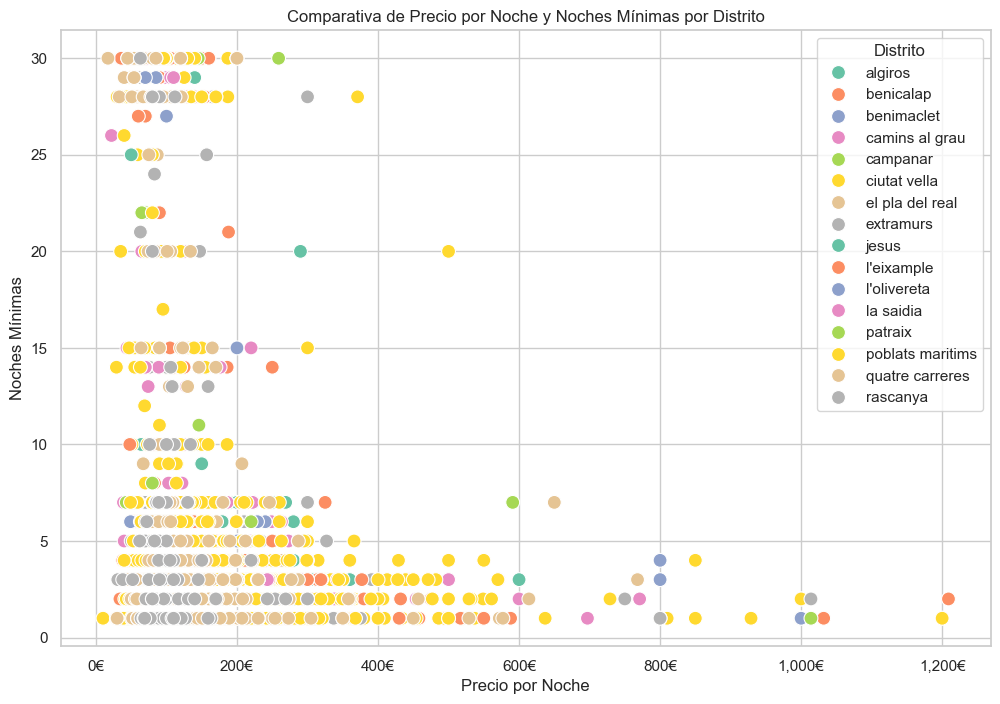

In [65]:
#mejora con ChatGPT

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura
plt.figure(figsize=(12, 8))

# Personalizar colores y paleta
colors = sns.color_palette("Set2")

# Crear el gráfico de dispersión
scatterplot = sns.scatterplot(
    x=airbnb_final['precio/noche'],
    y=airbnb_final['noches_min'],
    hue=airbnb_final['distrito'],
    s=100,
    palette=colors
)

# Añadir título y etiquetas de ejes
plt.title('Comparativa de Precio por Noche y Noches Mínimas por Distrito')
plt.xlabel('Precio por Noche')
plt.ylabel('Noches Mínimas')

# Personalizar la leyenda
plt.legend(title='Distrito')

# Añadir separadores de miles en el eje X
scatterplot.get_xaxis().set_major_formatter(FuncFormatter(lambda x, loc: "{:,}€".format(int(x))))

# Mostrar la trama
plt.show()


In [66]:
airbnb_final.to_csv('airbnb_final')

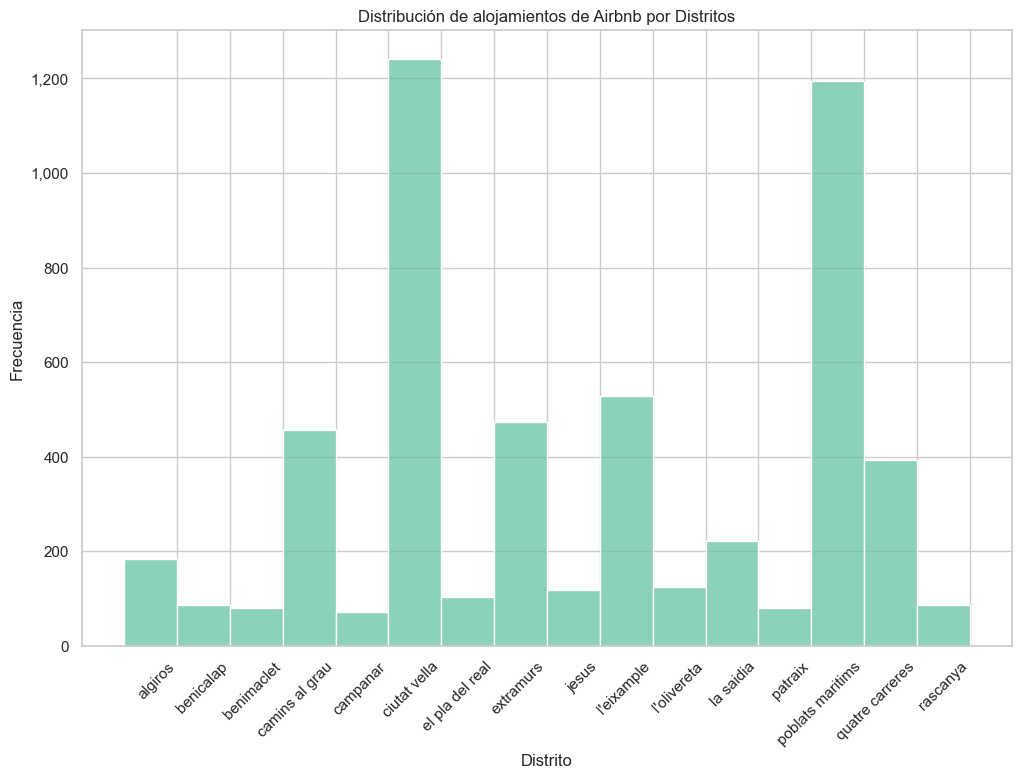

In [67]:
# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura
plt.figure(figsize=(12, 8))

# Personalizar colores y paleta
colors = sns.color_palette("Set2")

# Crear el gráfico de histograma
histplot = sns.histplot(data=airbnb_final, x=airbnb_final['distrito'], color=colors[0])

# Obtener las etiquetas de los distritos
distrito_labels = airbnb_final['distrito'].unique()

# Definir las posiciones de las etiquetas en el centro de las barras
bar_centers = [(i + 0.5) for i in range(len(distrito_labels))]

# Establecer las etiquetas en el centro de las barras
plt.xticks(bar_centers, distrito_labels, rotation=45, ha='right')

# Añadir título y etiquetas de ejes
plt.title('Distribución de alojamientos de Airbnb por Distritos')
plt.xlabel('Distrito')
plt.ylabel('Frecuencia')

# Añadir separadores de miles en el eje Y (si es necesario)
histplot.get_yaxis().set_major_formatter(FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Mostrar la trama
plt.show()
